# EDA (Exploratory Data Analysis)
- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends,patterns, or to check assumptions with the help of statistical summary and graphical representations.

# Steps Involved in EDA
1. Describing the data
2. Data Cleaning
3. Imputation techniques
4. Data analysis and Visualization
5. Transformations
6. Auto EDA


# Import data and data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
new_limit = 10000
sys.setrecursionlimit(new_limit) # for increse the limits

In [3]:
df = pd.read_csv("C:\\Users\\Priyanshu Chauhan\\Downloads\\data_clean.csv",index_col = 0) 
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [4]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [5]:
df.describe(include=object)

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


In [6]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


#
- As we can see that,
- 'Month' column has all the numeric data still python has shown us that it is object.
- We will have to find out the reason and change the data type of the column.

# Data type conversion

In [8]:
df['Month']

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

In [9]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [10]:
df['Month'].replace('May',5,inplace=True)

In [11]:
df['Month'].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [12]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [13]:
df['Month'].astype(int)

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int32

In [14]:
df['Month'] = df['Month'].astype(int)

In [15]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [16]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


# Duplicates 

In [17]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [18]:
df.duplicated().sum()

1

In [19]:
#Print the duplicated values

In [20]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,9,28,2010,75,S


In [21]:
df[(df['Ozone'] == 14.0) & (df['Solar.R'] ==191.0)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [22]:
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [23]:
#Drop Duplicated records

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(157, 8)

In [26]:
df.duplicated().sum()

0

# Drop columns
- There is one column which only has single different value.
- We need to get rid of all the uneccesary columns or else it will be very complex data.

In [27]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [28]:
df.drop(columns=['Year'],inplace=True)

In [29]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [30]:
data = df.drop(columns=['Temp'])

In [31]:
data

,Ozone,Solar.R,Wind,Month,Day,Weather
1,41.0,190.0,7.4,5,1,S
2,36.0,118.0,8.0,5,2,C
3,12.0,149.0,12.6,5,3,PS
4,18.0,313.0,11.5,5,4,S
5,NaN,NaN,14.3,5,5,S
...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,S
154,41.0,190.0,7.4,5,1,C
155,30.0,193.0,6.9,9,26,PS
156,NaN,145.0,13.2,9,27,S


# Rename the columns

In [32]:
df.head()


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


In [33]:
df.rename(columns={'Solar.R':'Solar','Temp':'Temperature'},inplace=True)

In [34]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# Missing value imputation
 - In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
     - Improper handling of data
     - And many more.

In [35]:
#Checking null values

In [36]:
df 

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [37]:
df.isna()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


<Axes: >

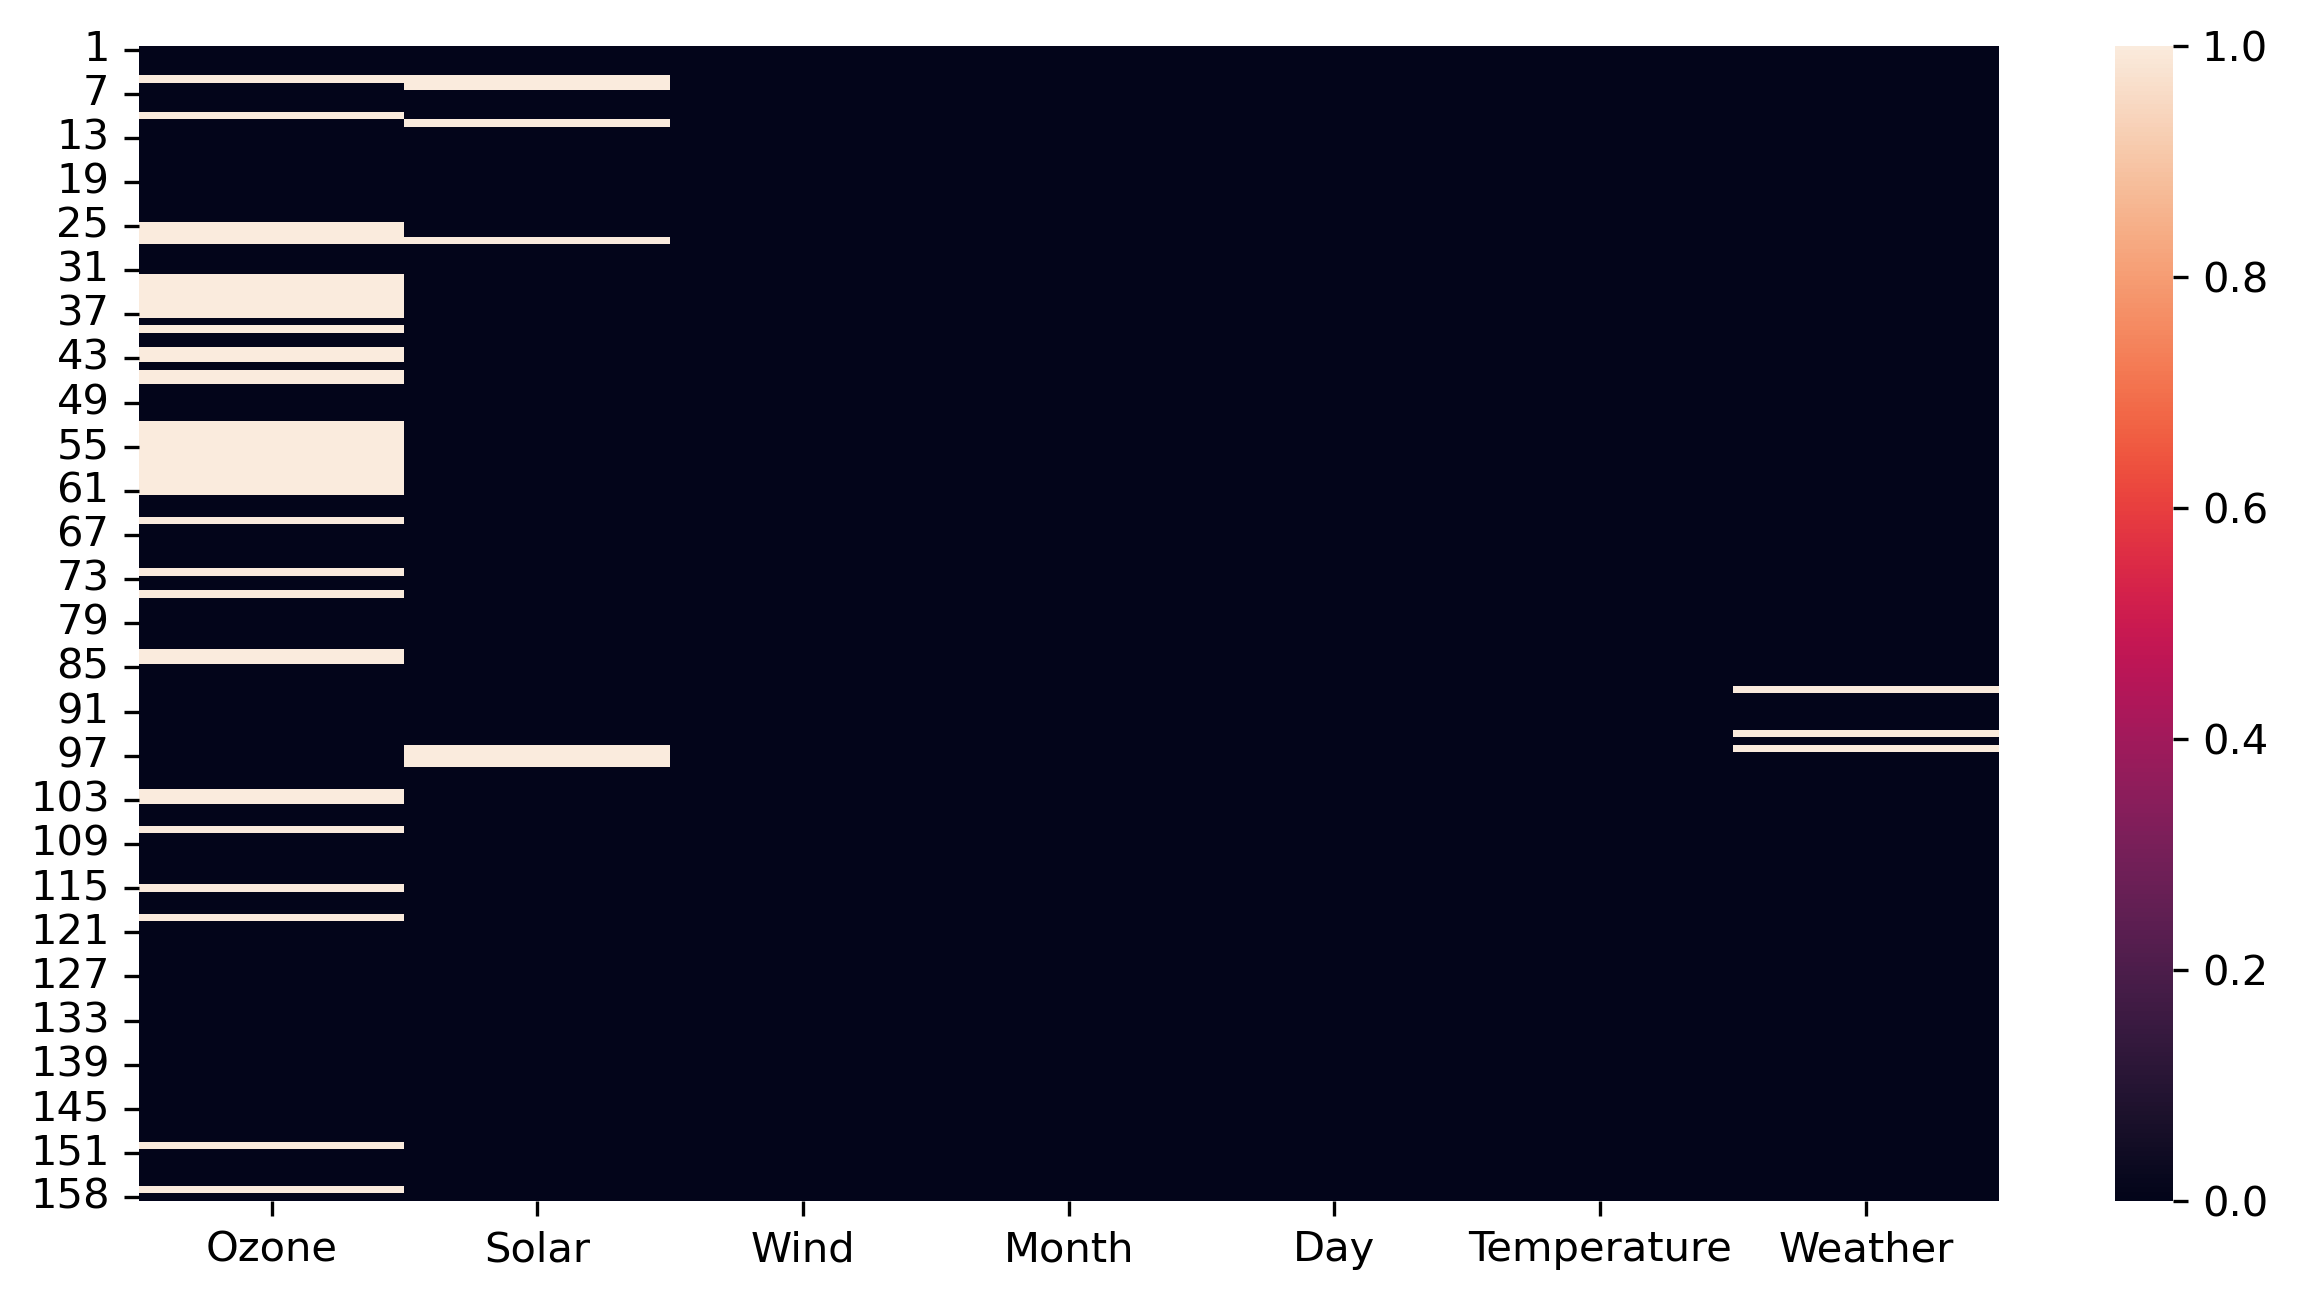

In [38]:
#visualizing missing values
sns.heatmap(df.isna())

<Axes: >

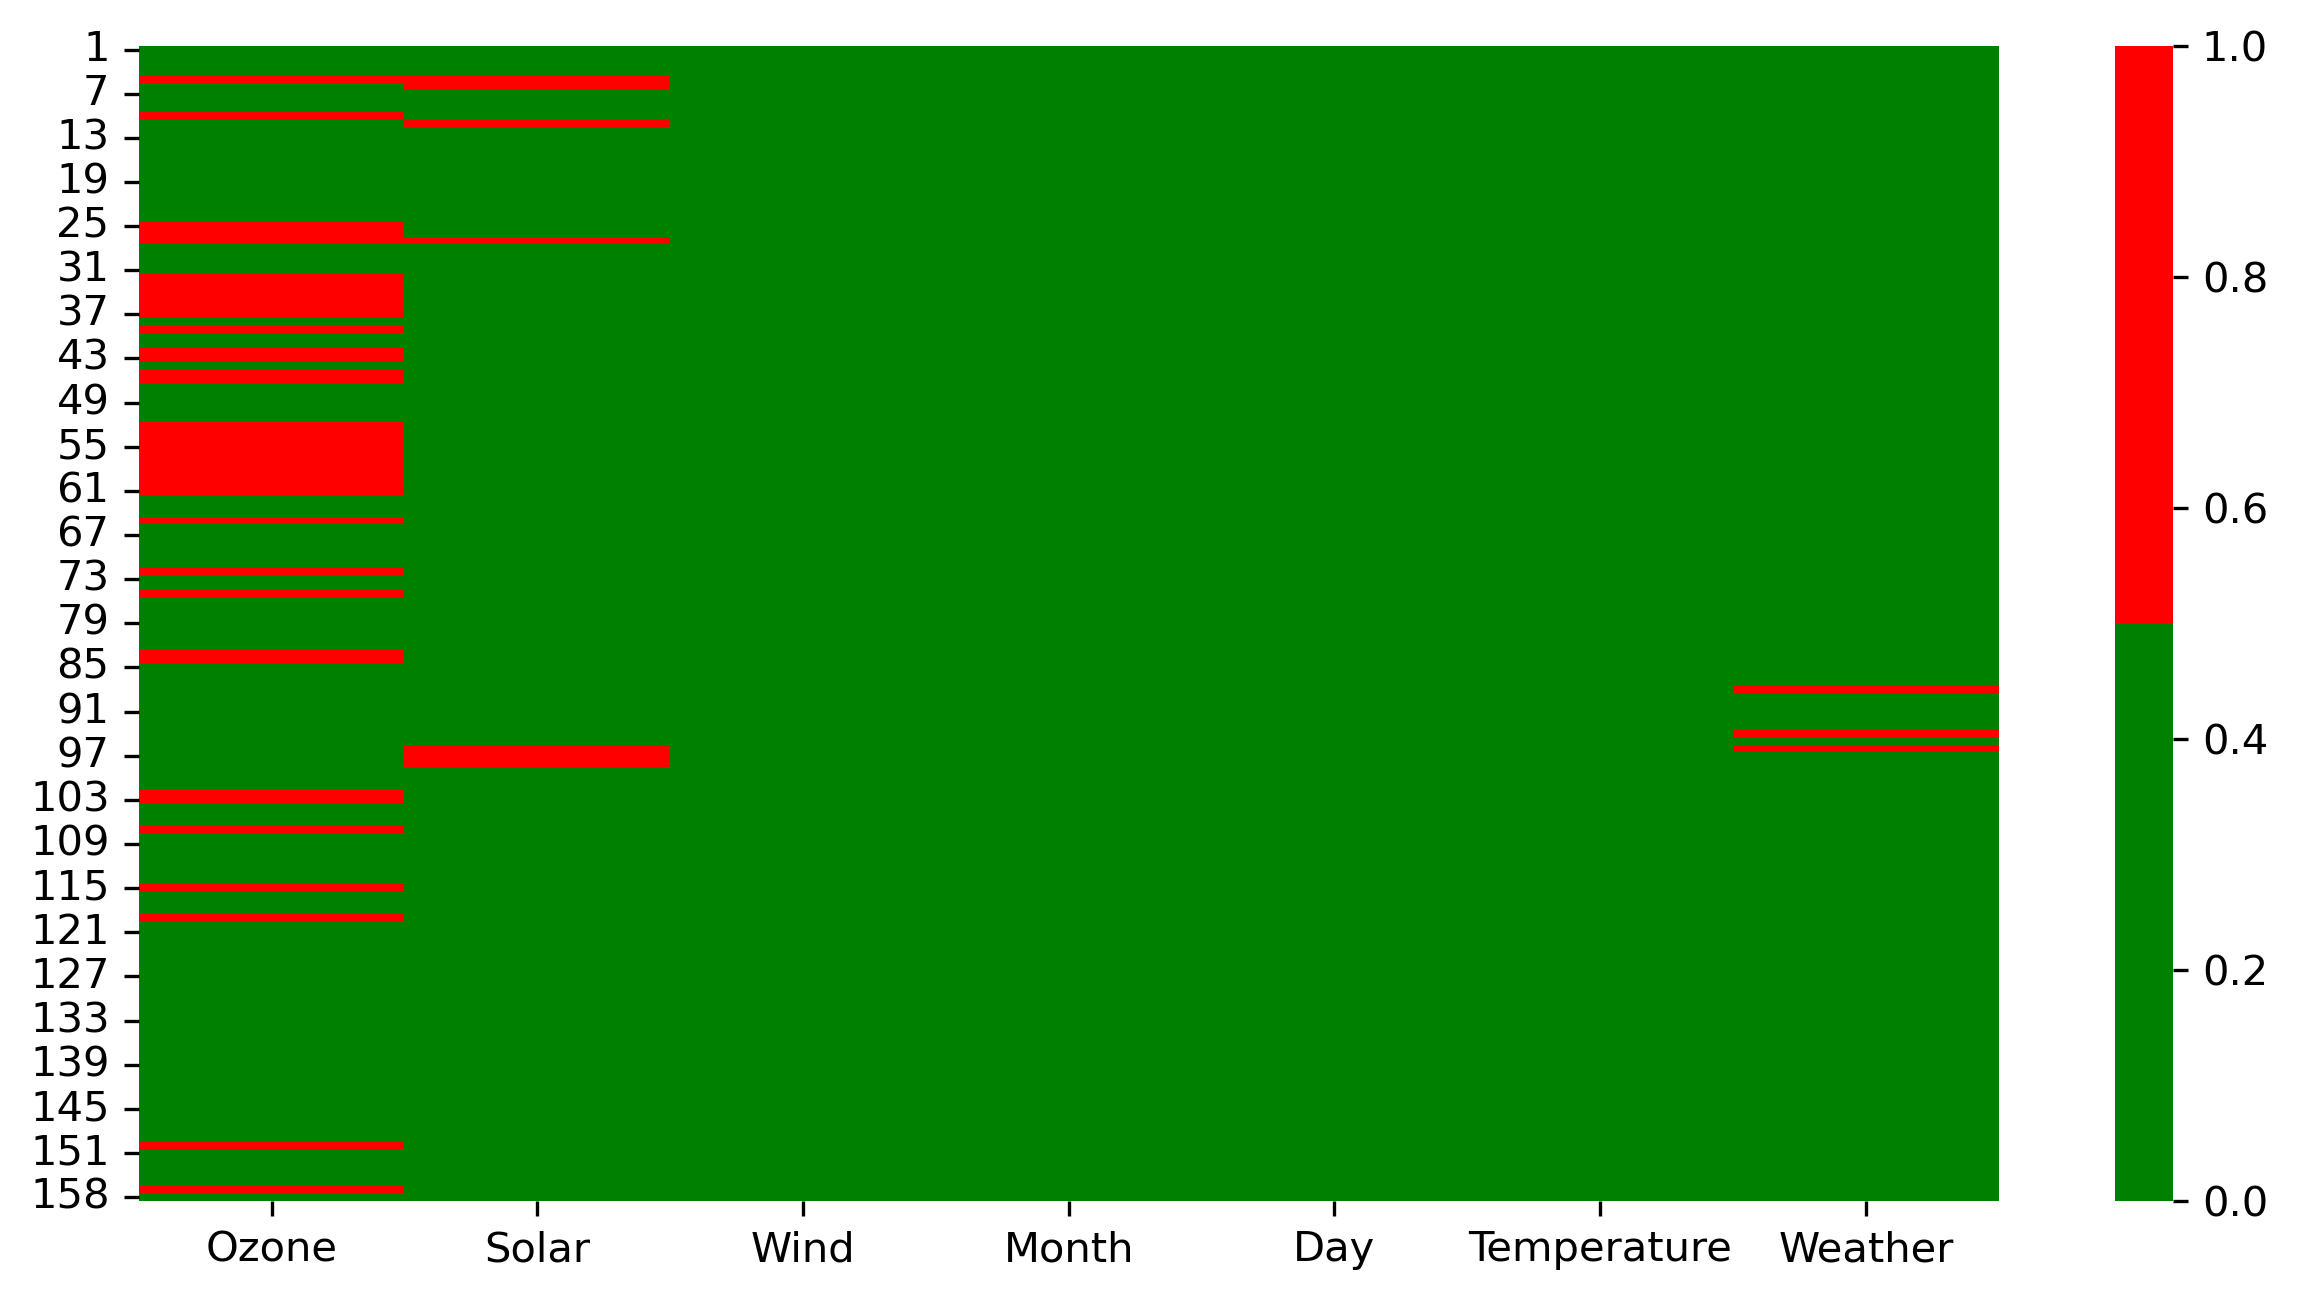

In [39]:
sns.heatmap(df.isna(),cmap = ['green','red'])

In [40]:
df.isna().sum() # for search missing values

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [41]:
#for %
#calculate the percentage od missing values in each column
for i in df.isna().sum():
    print((i/len(df))*100)


24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


# Rule for missing value imputation.
1. If NA values are between 1 to 5%, drop na (rows)
2. If NA value are 5 to 40%, fillna(replace).
3. If NA values are greater than 50% in a column, drop that entire column.

In [42]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


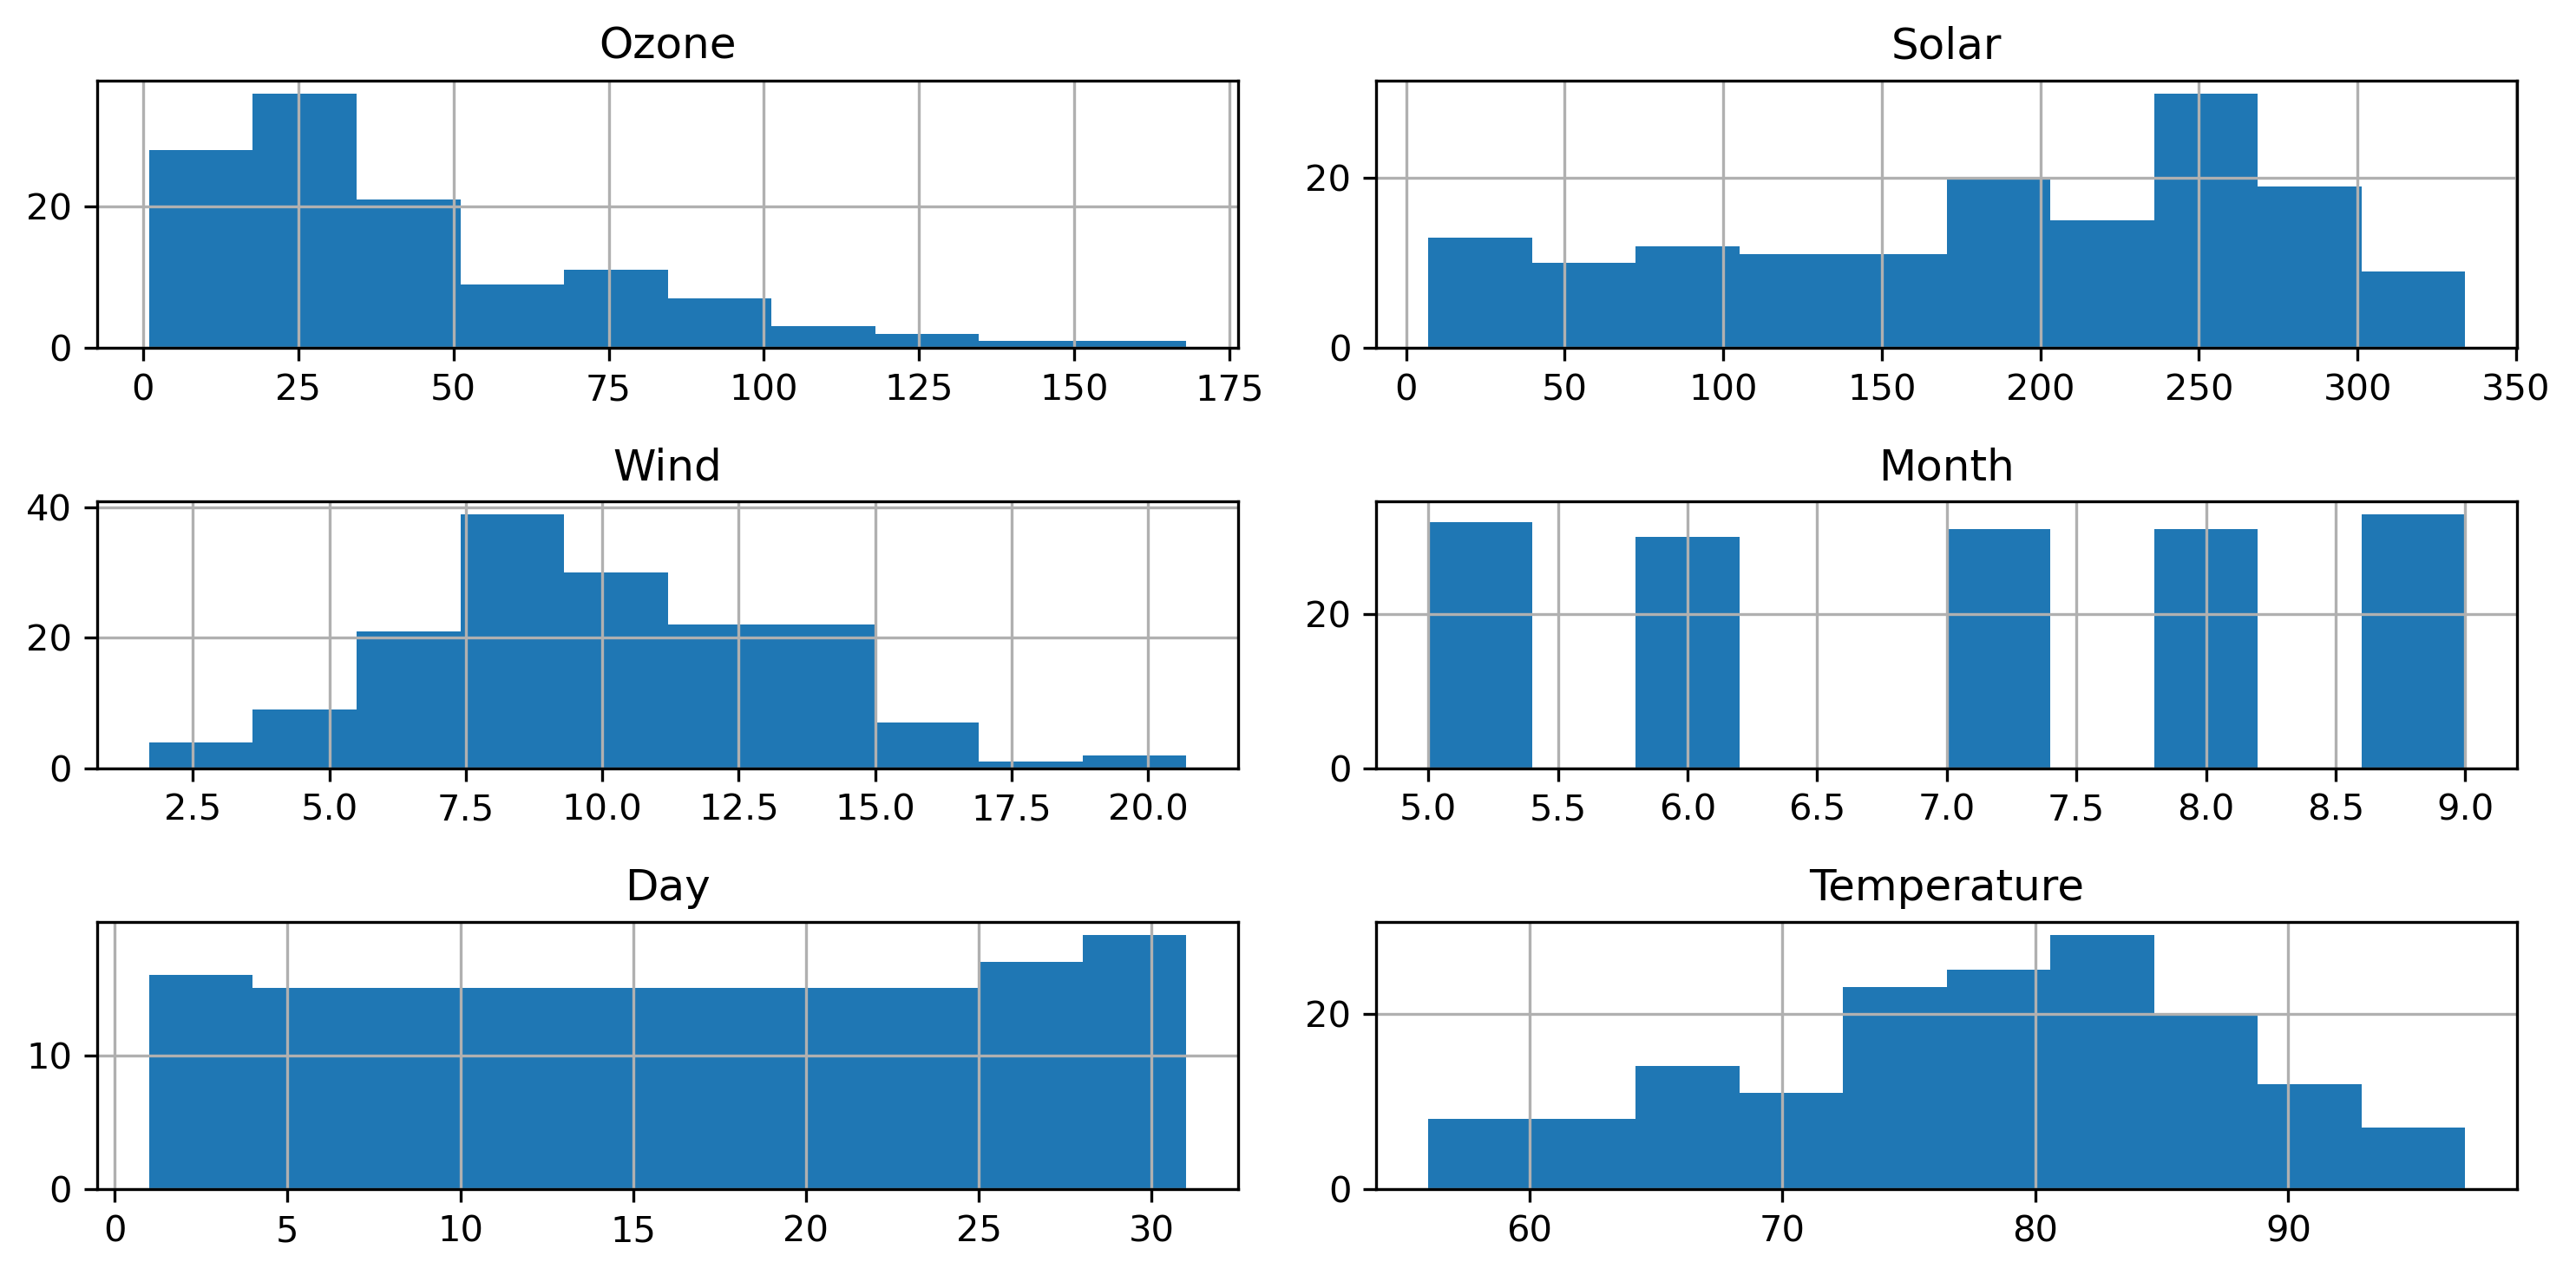

In [43]:
df.hist()
plt.tight_layout() 

<Axes: xlabel='Solar'>

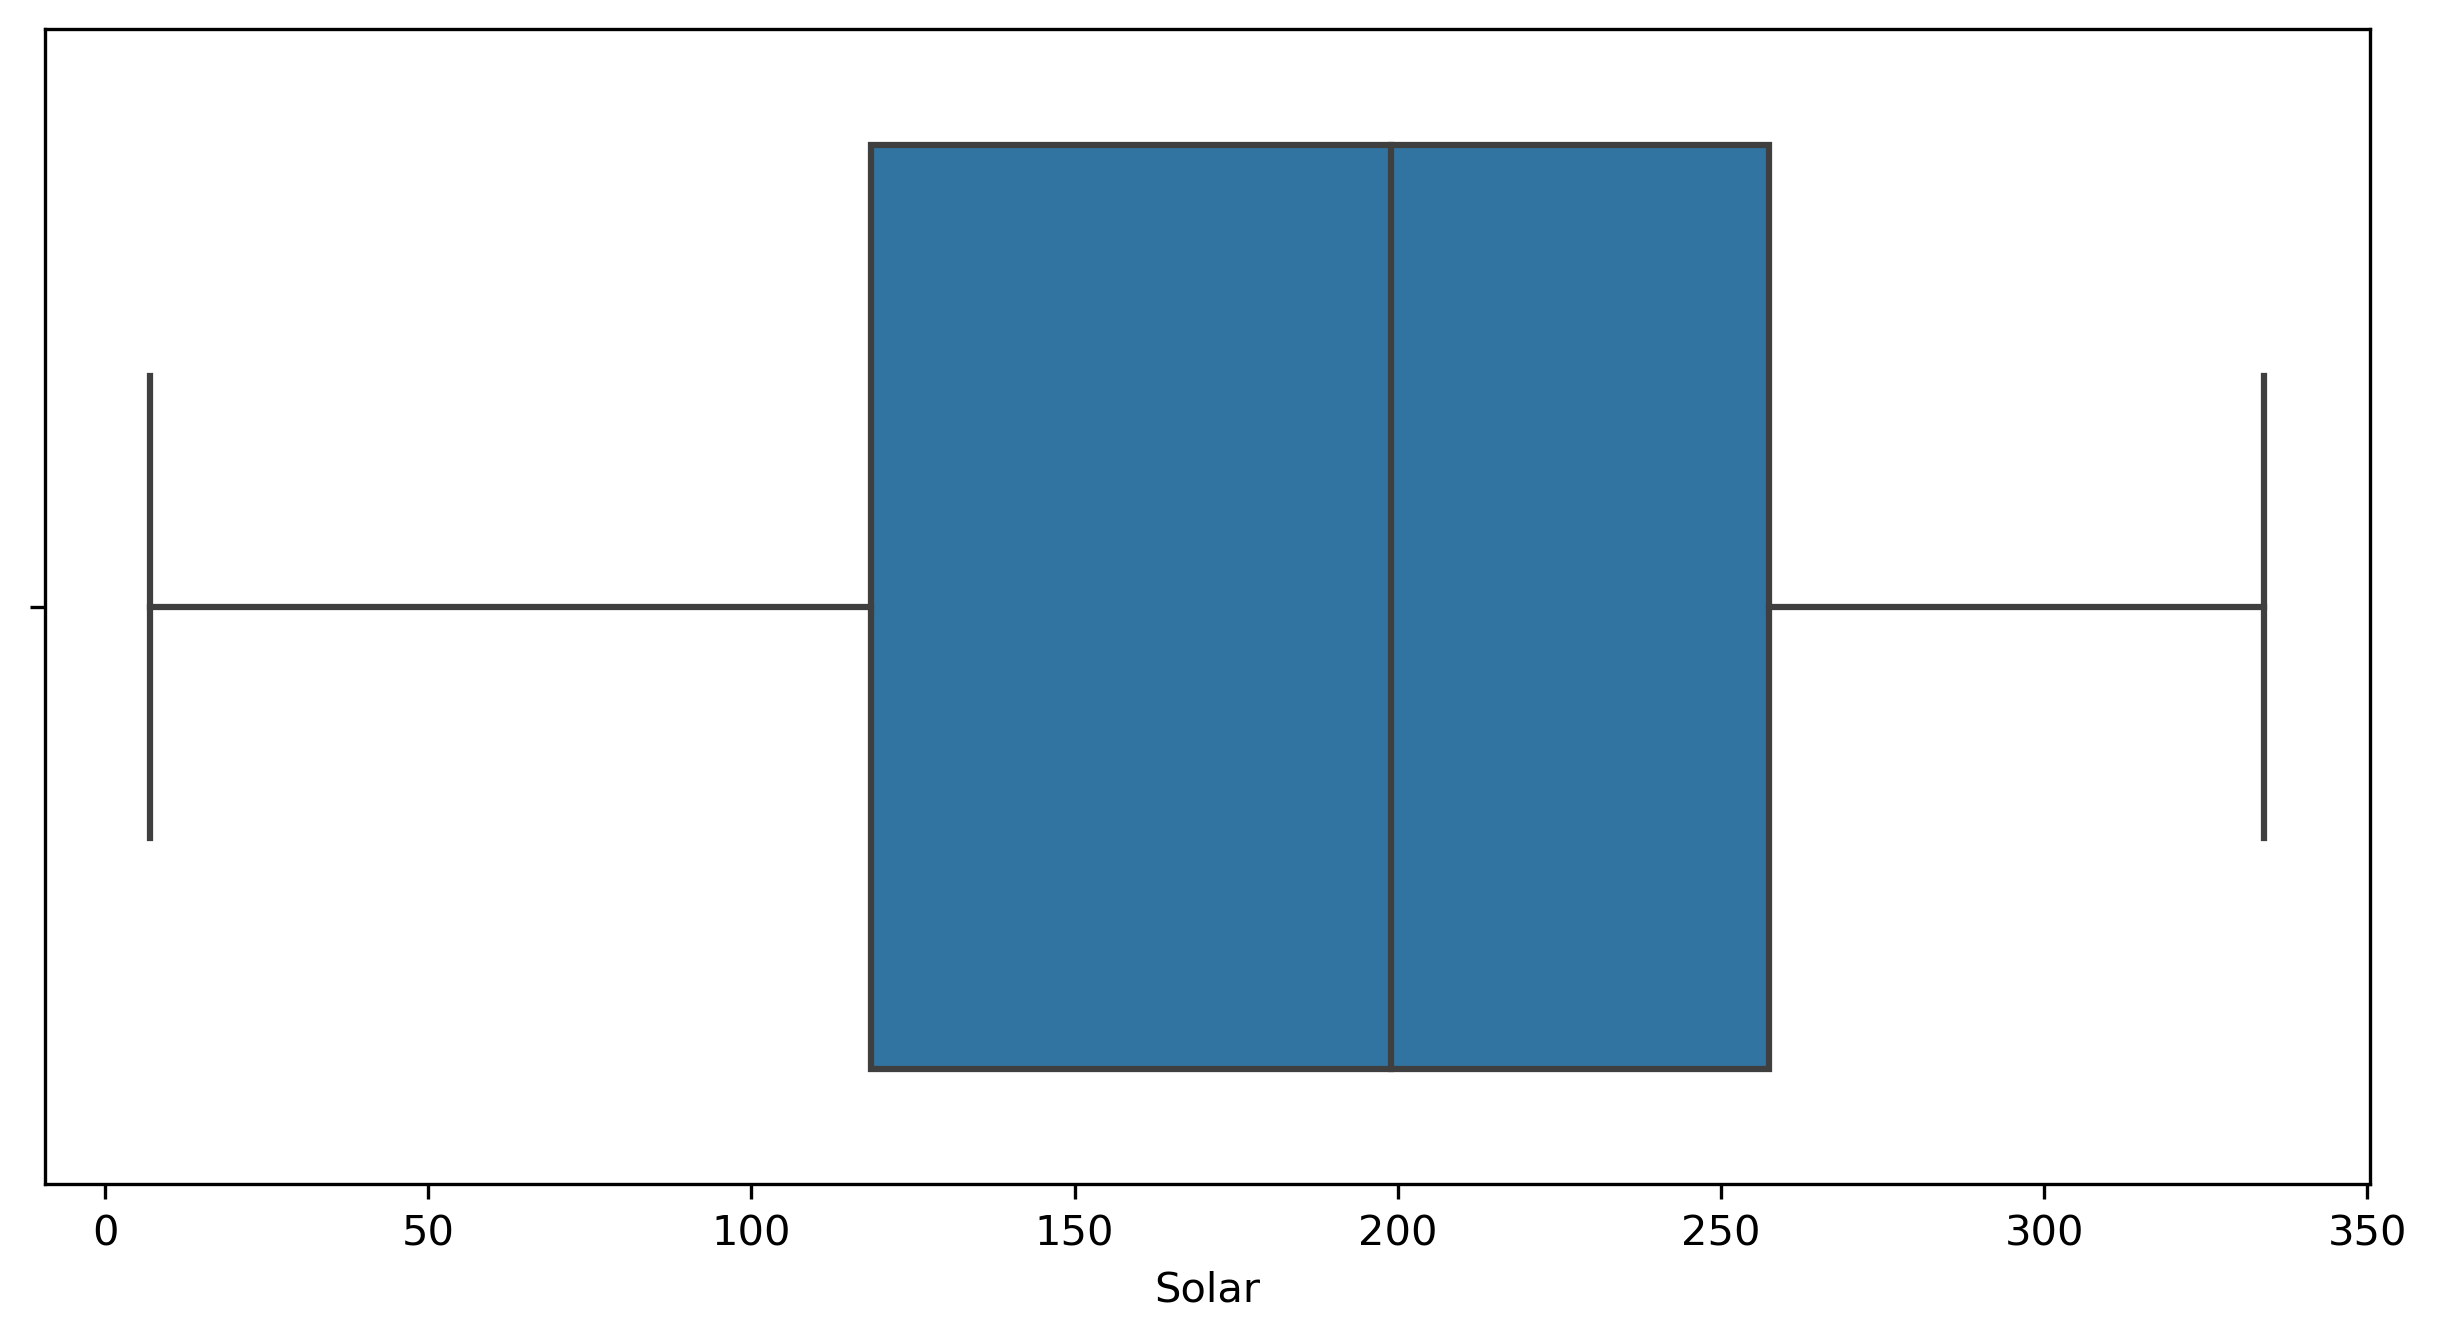

In [44]:
sns.boxplot(x = df['Solar'])

In [45]:
#1
df['Ozone'].median()

31.0

In [46]:
#2
ozone_median = df['Ozone'].median()

In [47]:
df['Ozone'].fillna(ozone_median )

1      41.0
2      36.0
3      12.0
4      18.0
5      31.0
       ... 
153    20.0
154    41.0
155    30.0
156    31.0
158    18.0
Name: Ozone, Length: 157, dtype: float64

In [48]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [49]:
df['Ozone'].fillna(ozone_median, inplace = True) # for change permanate.

In [50]:
df.isna().sum()

Ozone          0
Solar          7
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [51]:
df['Solar'].fillna(df['Solar'].mean, inplace = True)

In [52]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [53]:
df['Weather'].mode()[0]

'S'

In [54]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace = True)

In [55]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

# Outlier detection
- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [56]:
df.describe()

,Ozone,Wind,Month,Day,Temperature
count,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,9.929936,7.019108,15.929936,77.745223
std,28.781992,3.505188,1.434338,8.974404,9.405334
min,1.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,20.700000,9.000000,31.000000,97.000000


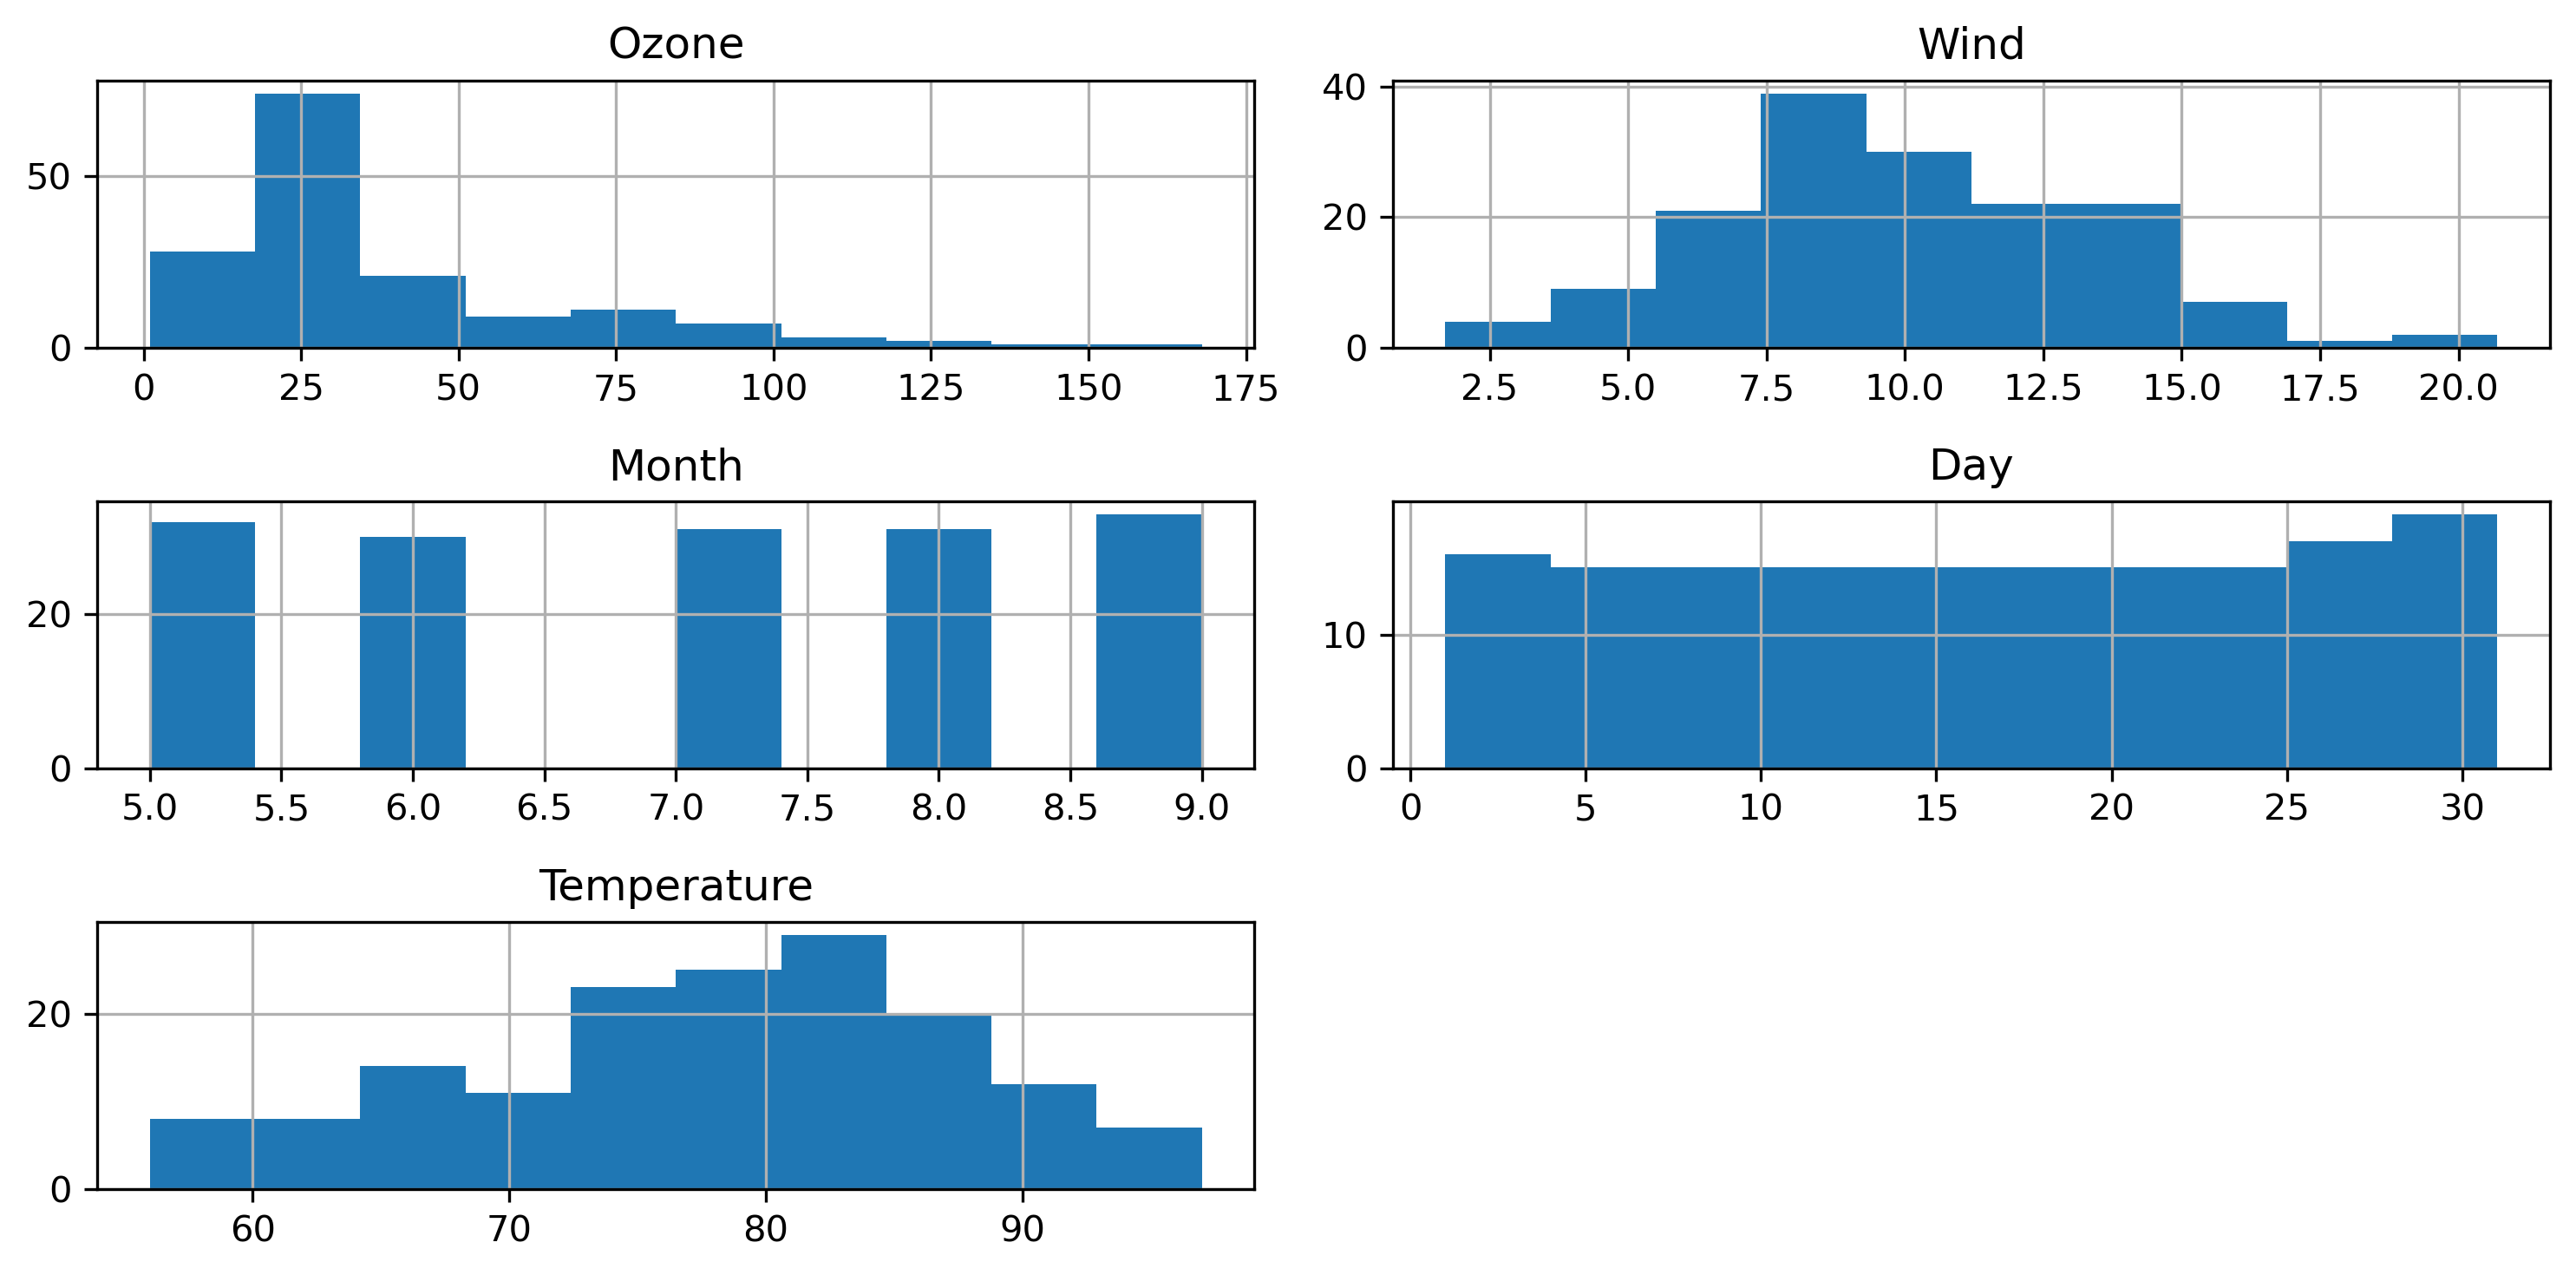

In [57]:
#Hisogram
df.hist()
plt.tight_layout()

<Axes: >

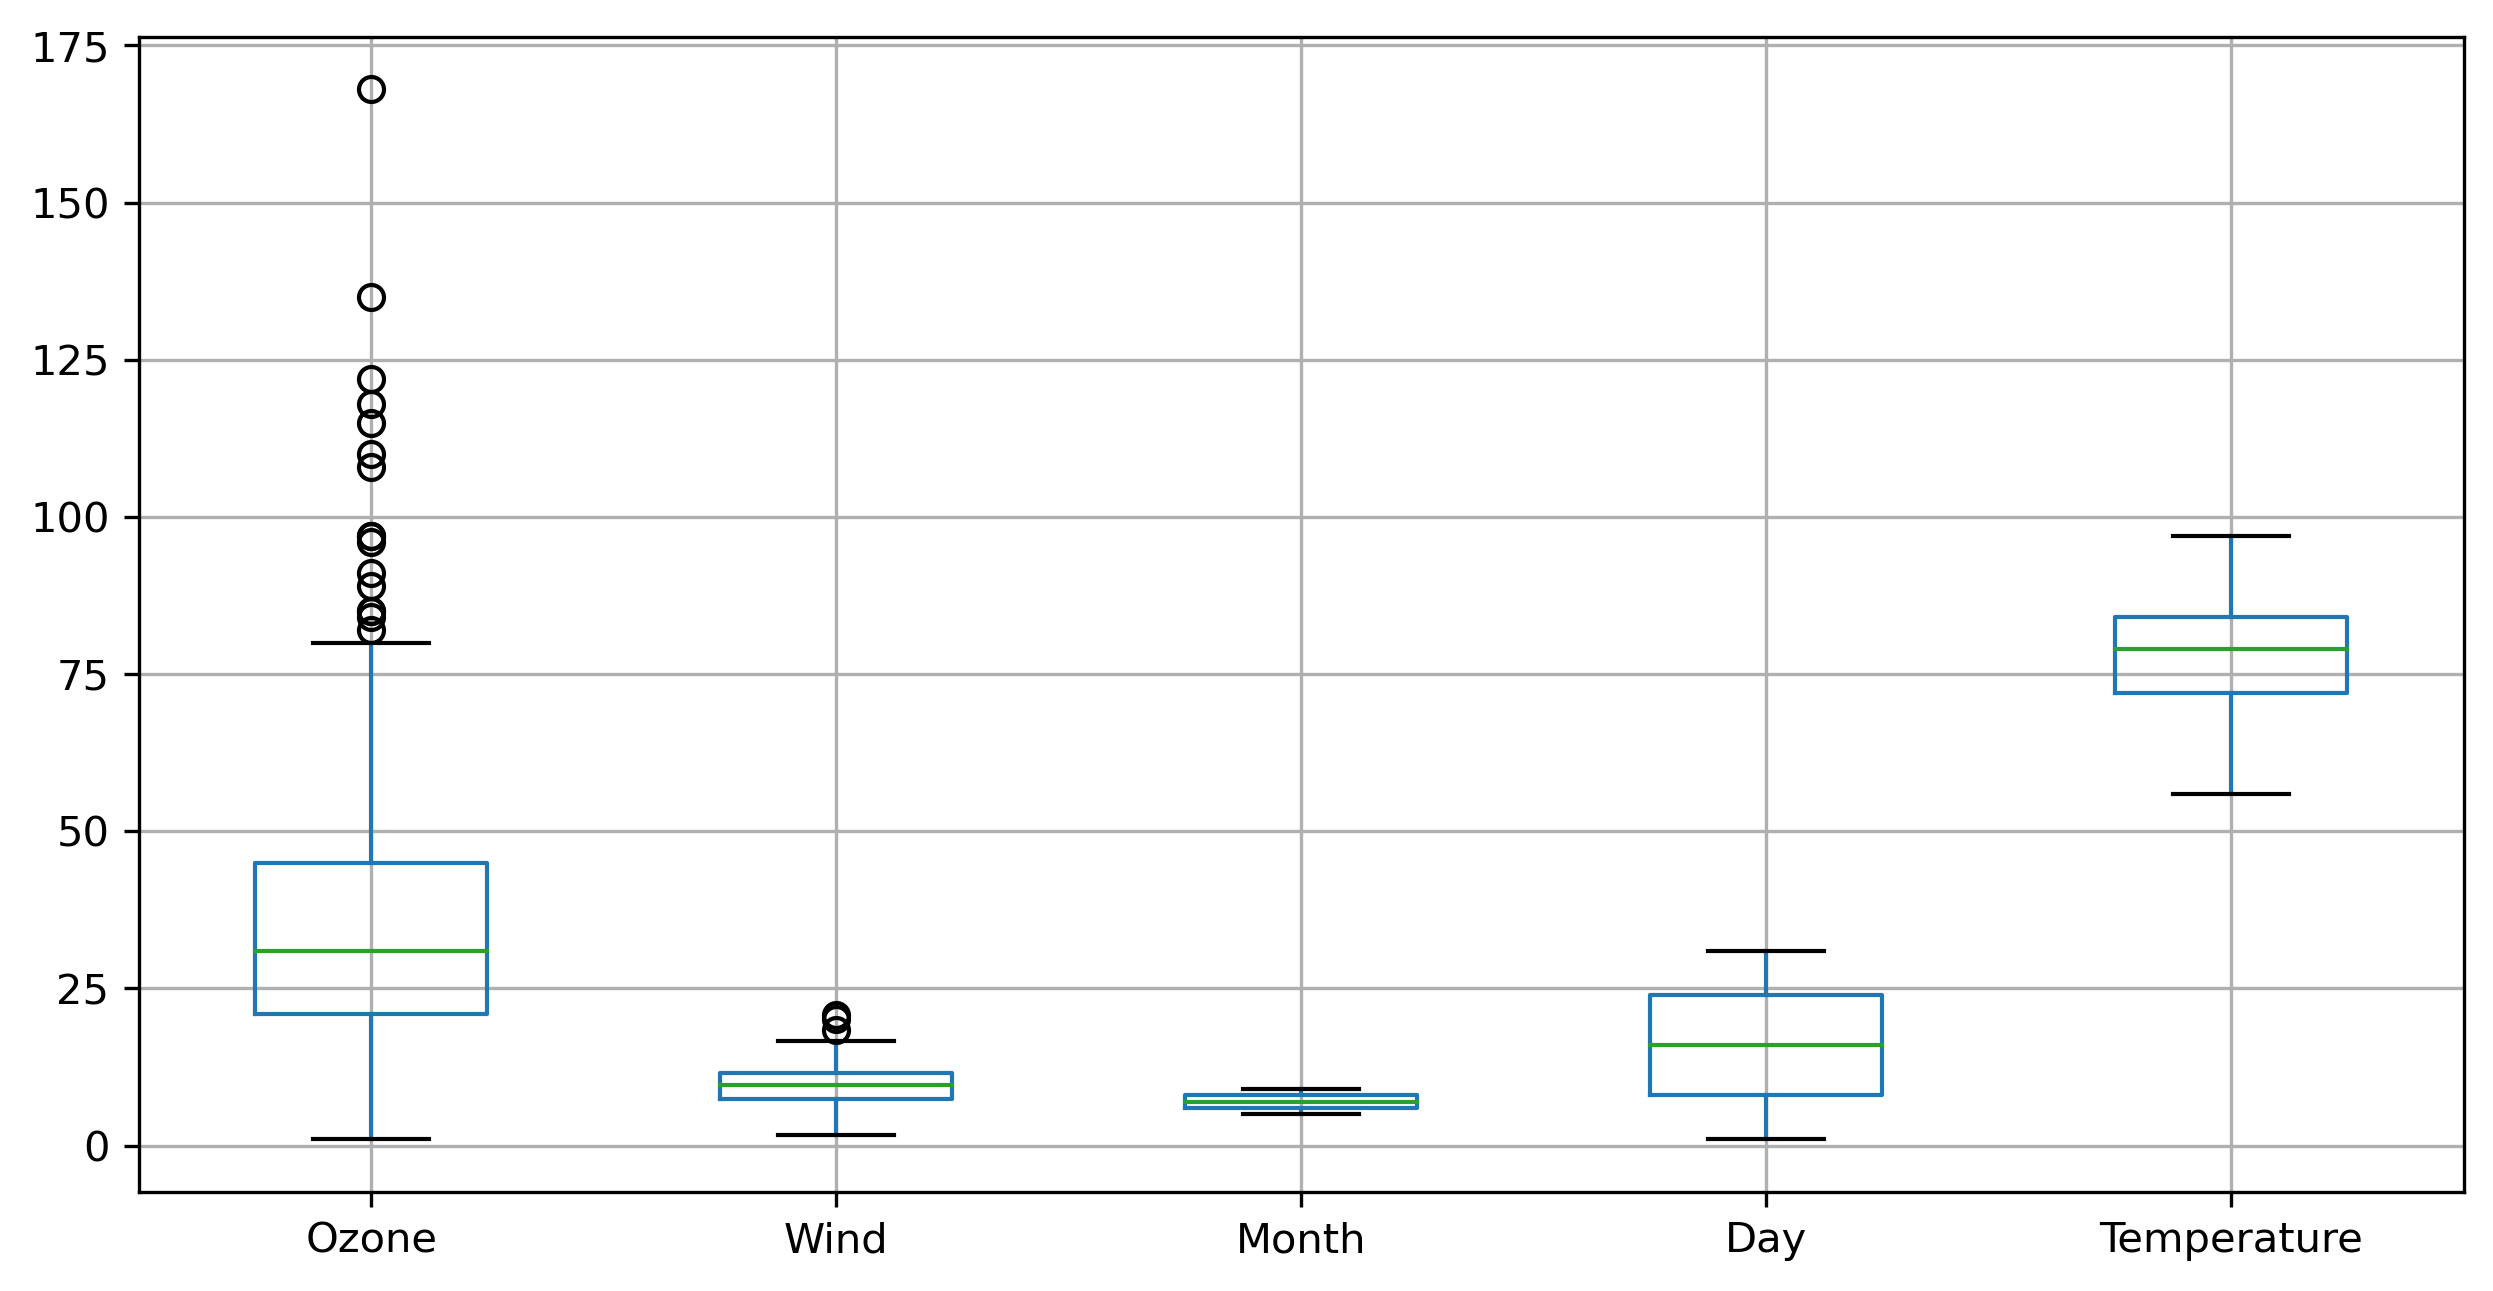

In [58]:
df.boxplot()

In [59]:
#Outlier detection function

In [60]:
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    
    return lower, upper

In [61]:
outlier_detection(df,'Ozone')

(-15.0, 81.0)

In [62]:
df['Ozone'] > 81.0

1      False
2      False
3      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
158    False
Name: Ozone, Length: 157, dtype: bool

In [63]:
df[df['Ozone']>81.0]

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
30,115.0,223.0,5.7,5,30,79,C
62,135.0,269.0,4.1,7,1,84,S
69,97.0,267.0,6.3,7,8,92,PS
70,97.0,272.0,5.7,7,9,92,C
71,85.0,175.0,7.4,7,10,89,PS
86,108.0,223.0,8.0,7,25,85,PS
89,82.0,213.0,7.4,7,28,88,S
99,122.0,255.0,4.0,8,7,89,C
100,89.0,229.0,10.3,8,8,90,PS
101,110.0,207.0,8.0,8,9,90,C


In [64]:
df.loc[df['Ozone']>81.0,'Ozone']

30     115.0
62     135.0
69      97.0
70      97.0
71      85.0
86     108.0
89      82.0
99     122.0
100     89.0
101    110.0
117    168.0
121    118.0
122     84.0
123     85.0
124     96.0
127     91.0
Name: Ozone, dtype: float64

In [65]:
df.loc[df['Ozone'] > 81.0,'Solar'] # for checking all columns only.

30     223.0
62     269.0
69     267.0
70     272.0
71     175.0
86     223.0
89     213.0
99     255.0
100    229.0
101    207.0
117    238.0
121    225.0
122    237.0
123    188.0
124    167.0
127    189.0
Name: Solar, dtype: object

In [66]:
#Capping Outliers

In [67]:
df.loc[df['Ozone']>81.0,'Ozone'] = 81.0

<Axes: xlabel='Ozone'>

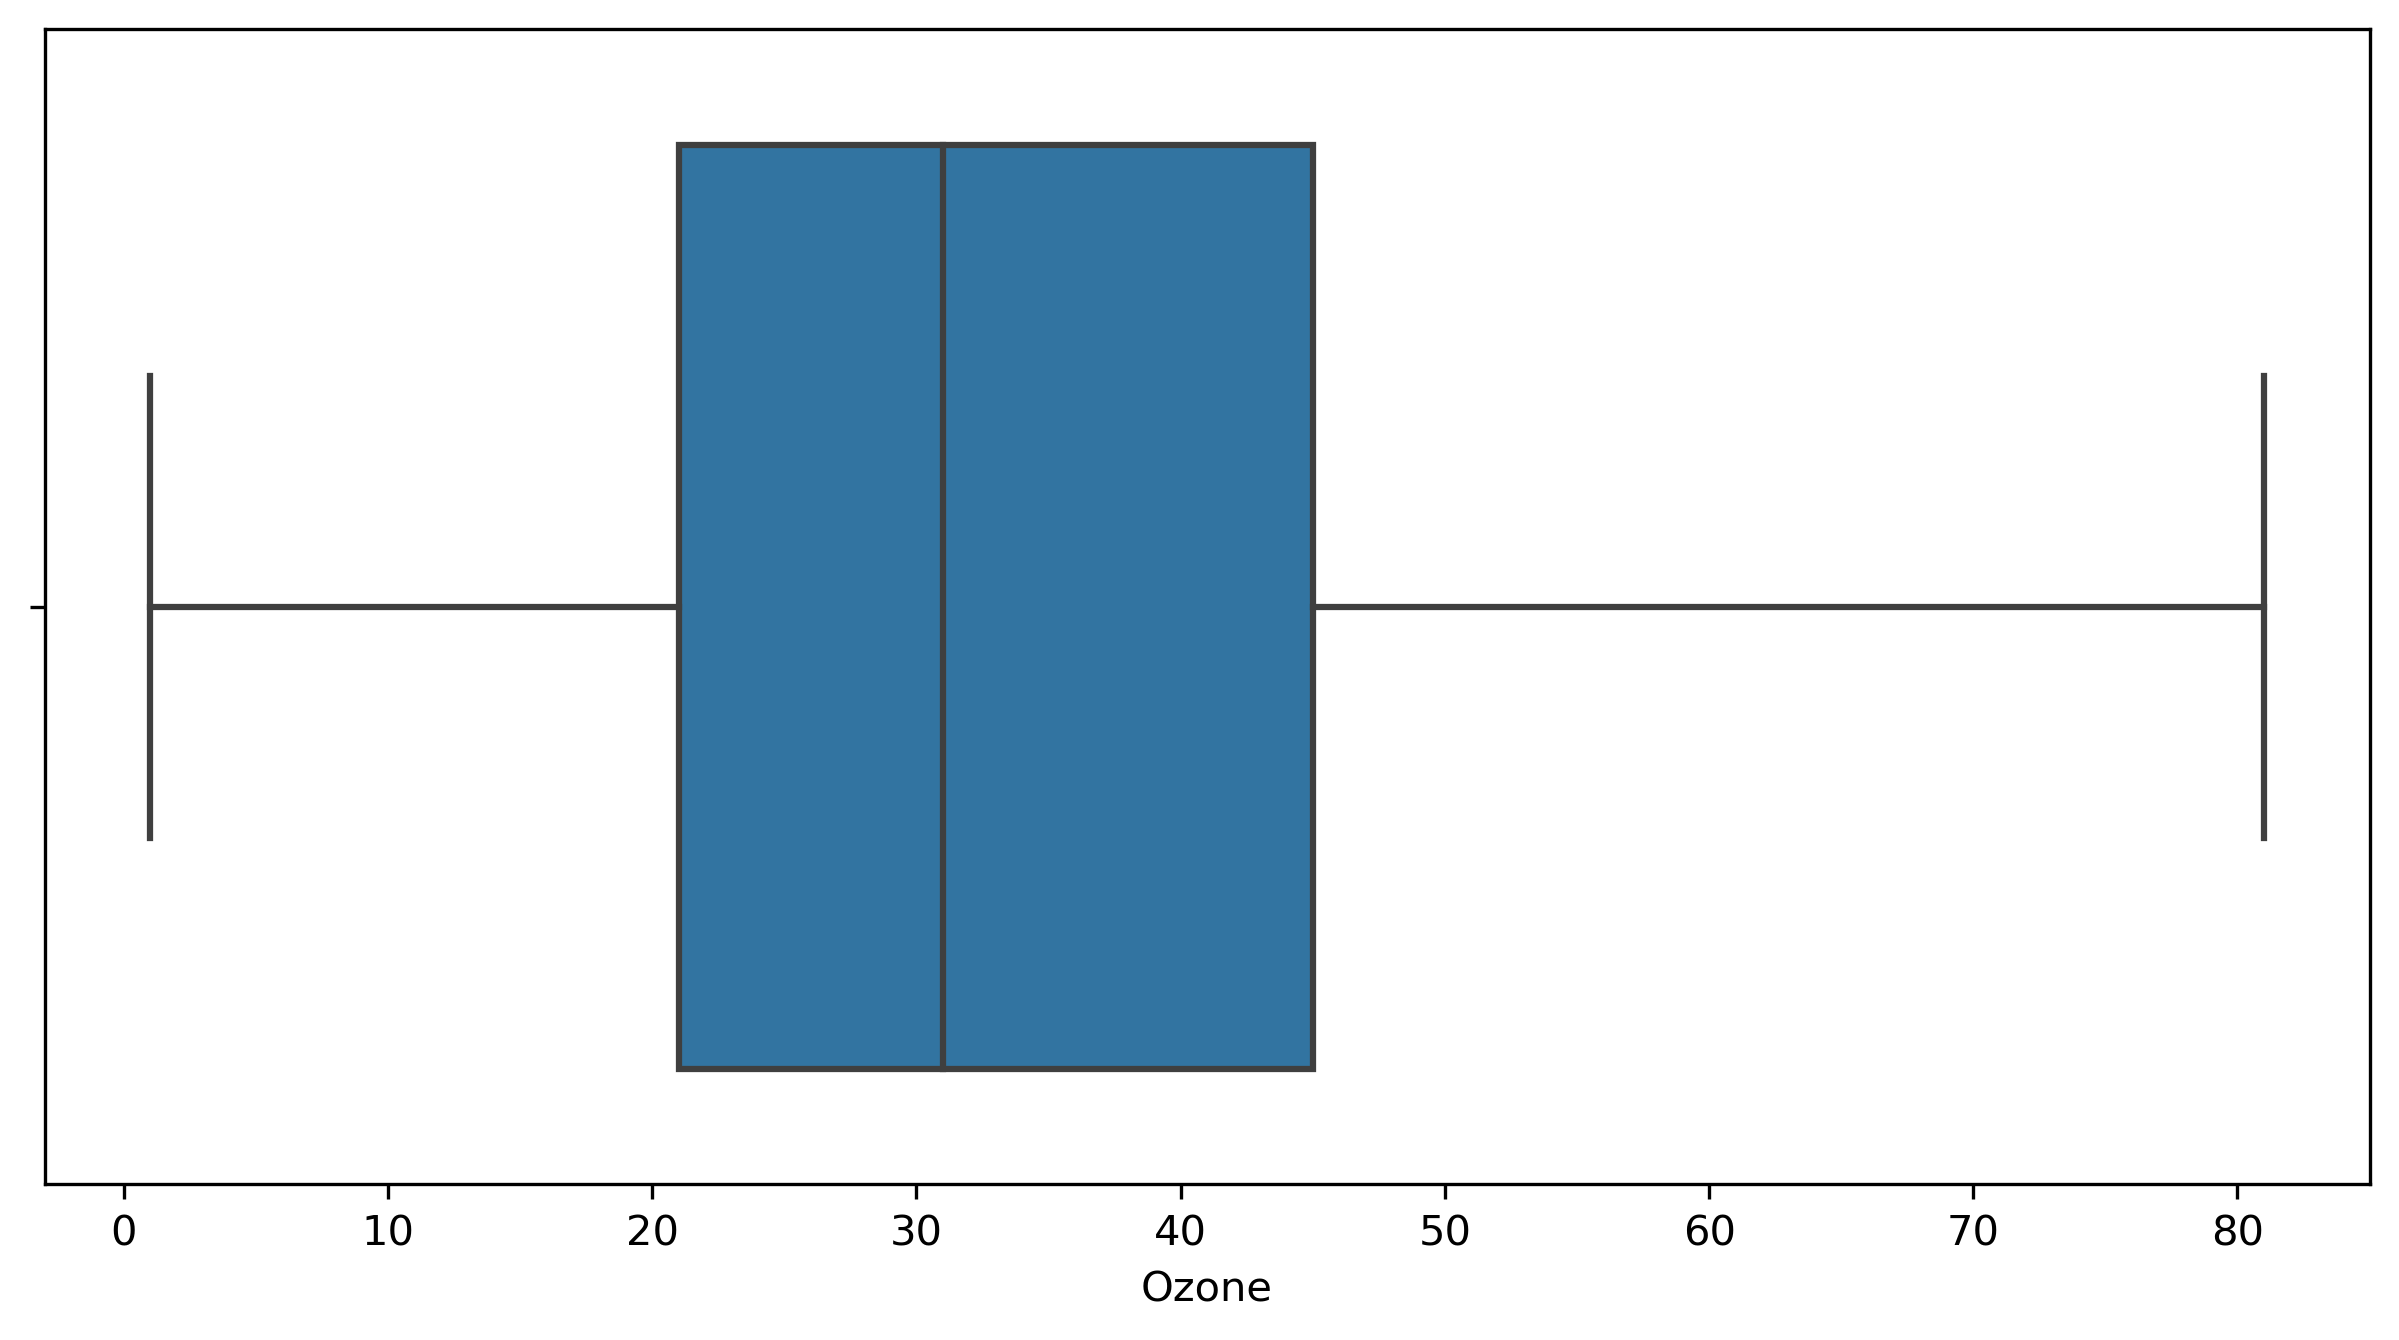

In [68]:
sns.boxplot(x = df['Ozone'])

# Scatter Plot and Correlation

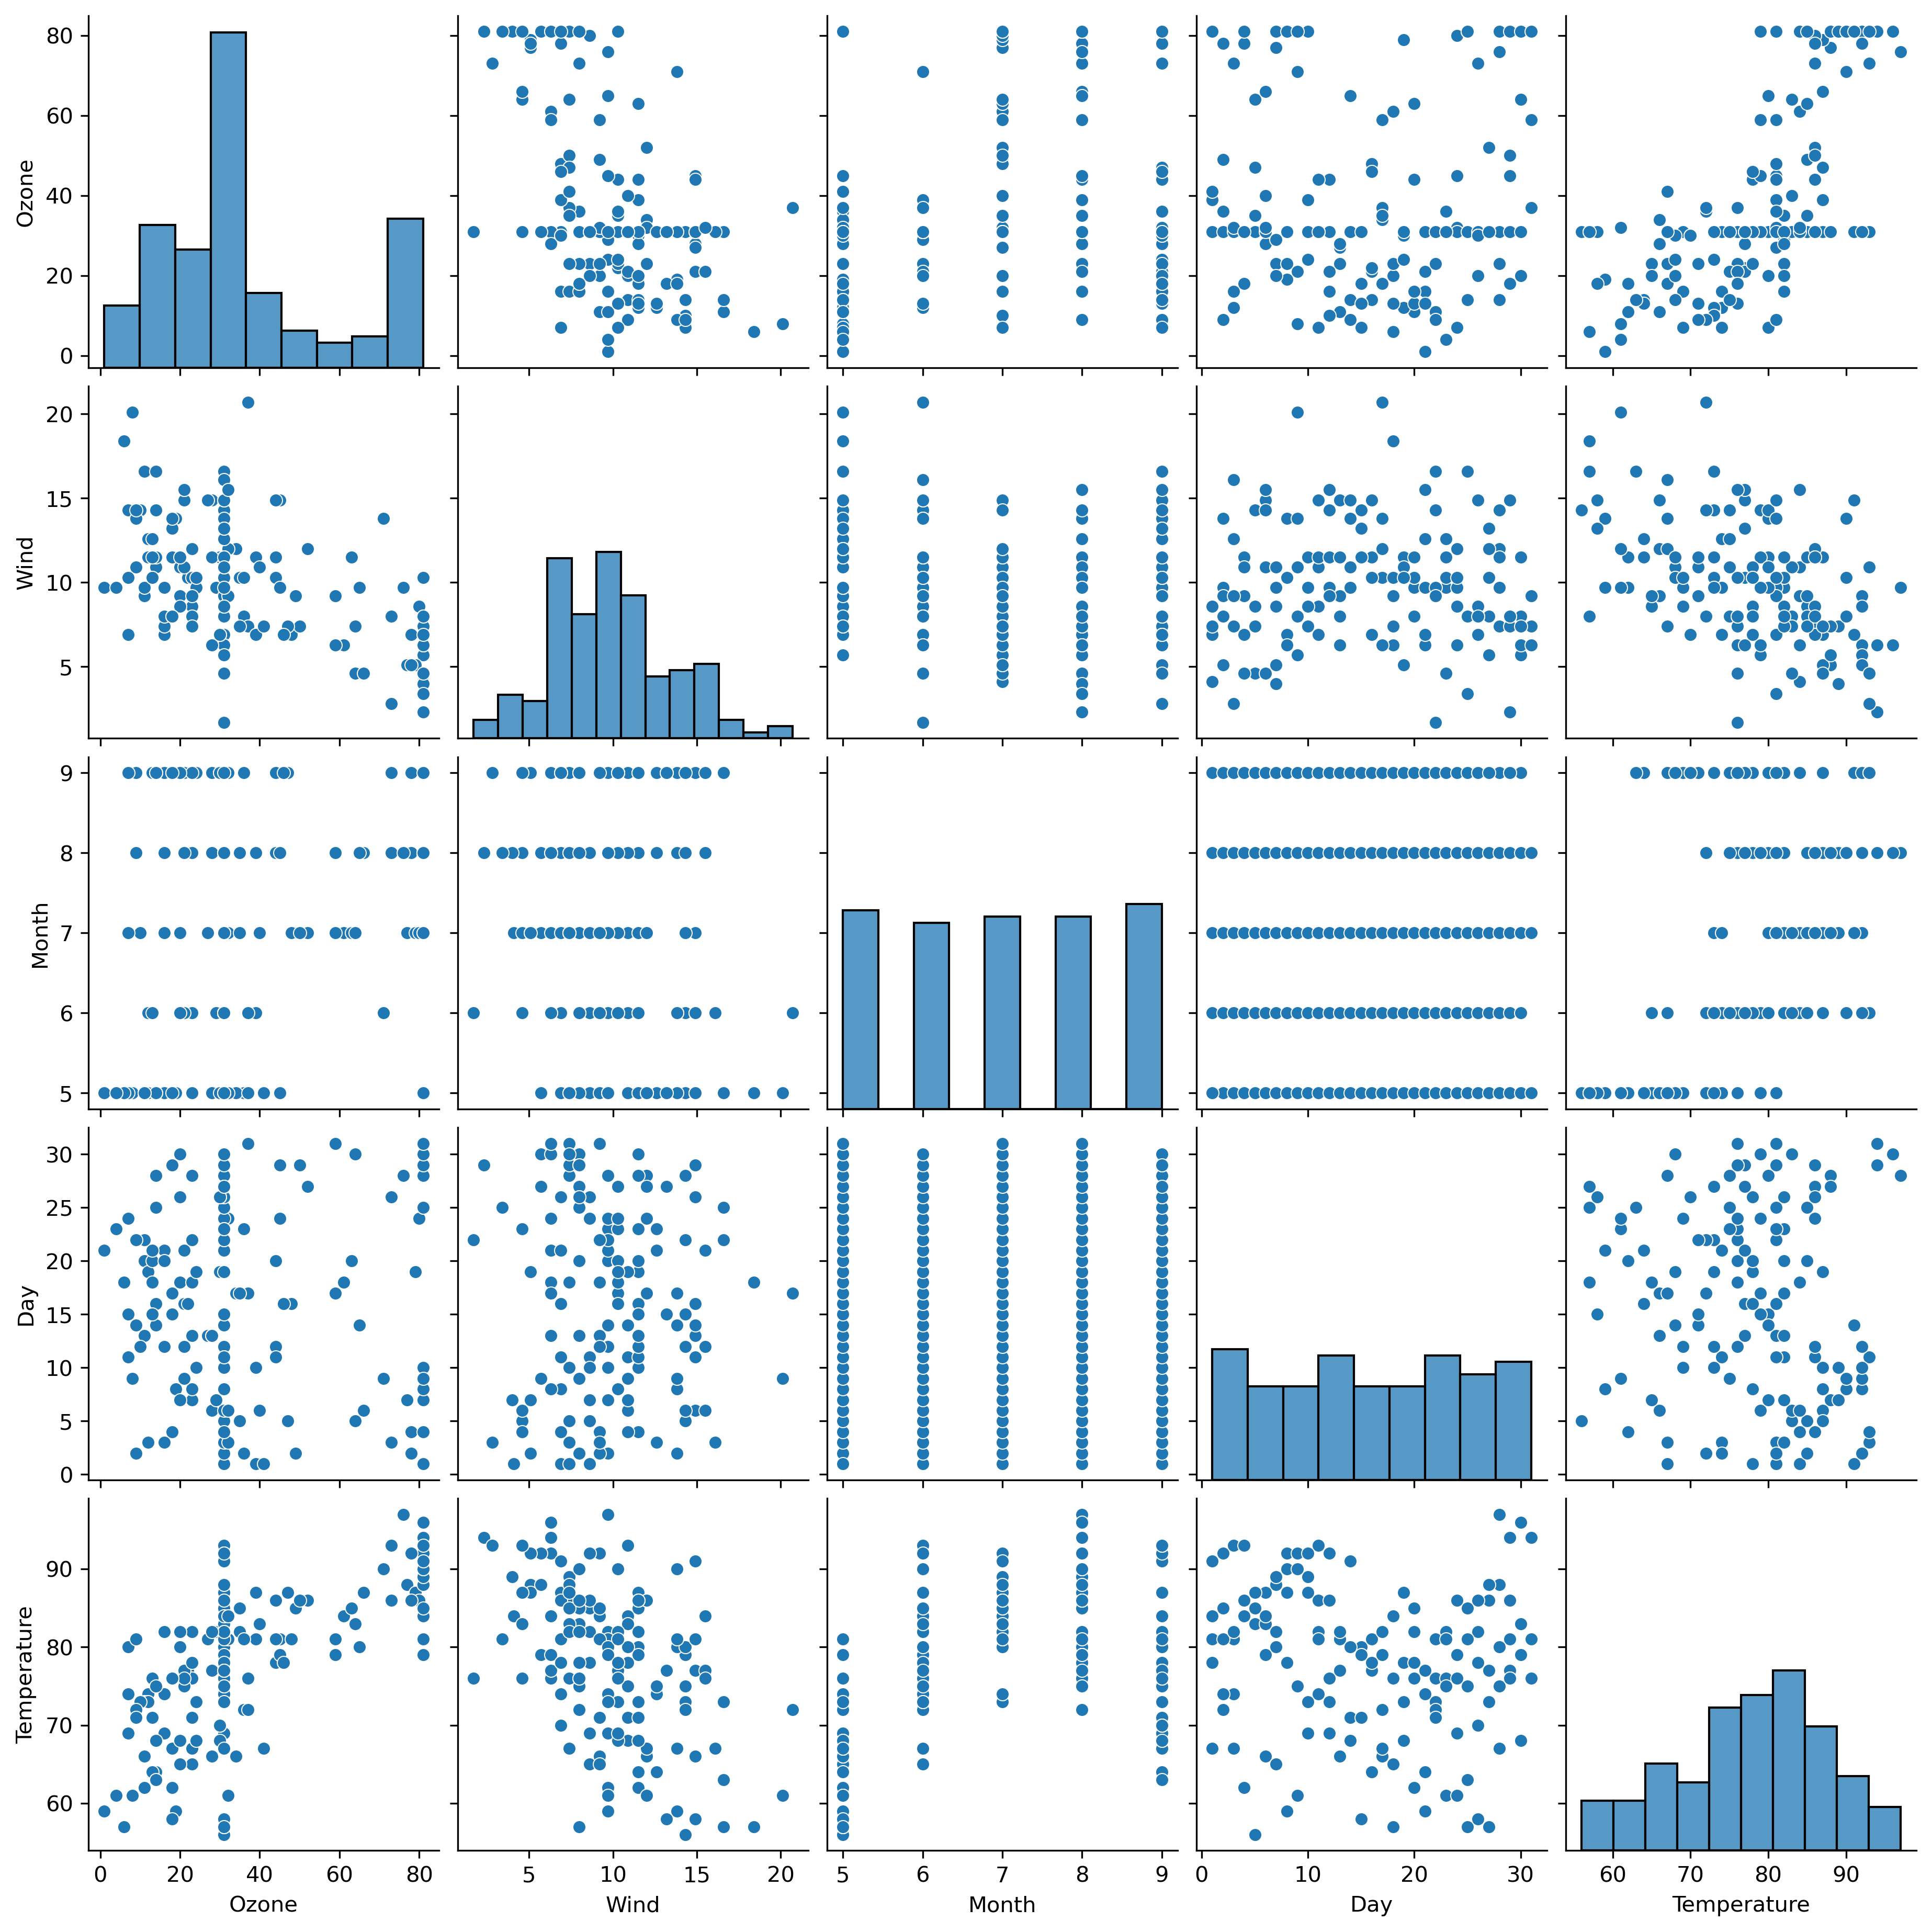

In [69]:
sns.pairplot(df)

In [70]:
#correlation coefficient

In [71]:
df.corr()

,Ozone,Wind,Month,Day,Temperature
Ozone,1.000000,-0.514470,0.183089,-0.042835,0.662773
Wind,-0.514470,1.000000,-0.170328,0.029900,-0.441228
Month,0.183089,-0.170328,1.000000,0.041438,0.408060
Day,-0.042835,0.029900,0.041438,1.000000,-0.122787
Temperature,0.662773,-0.441228,0.408060,-0.122787,1.000000


<Axes: >

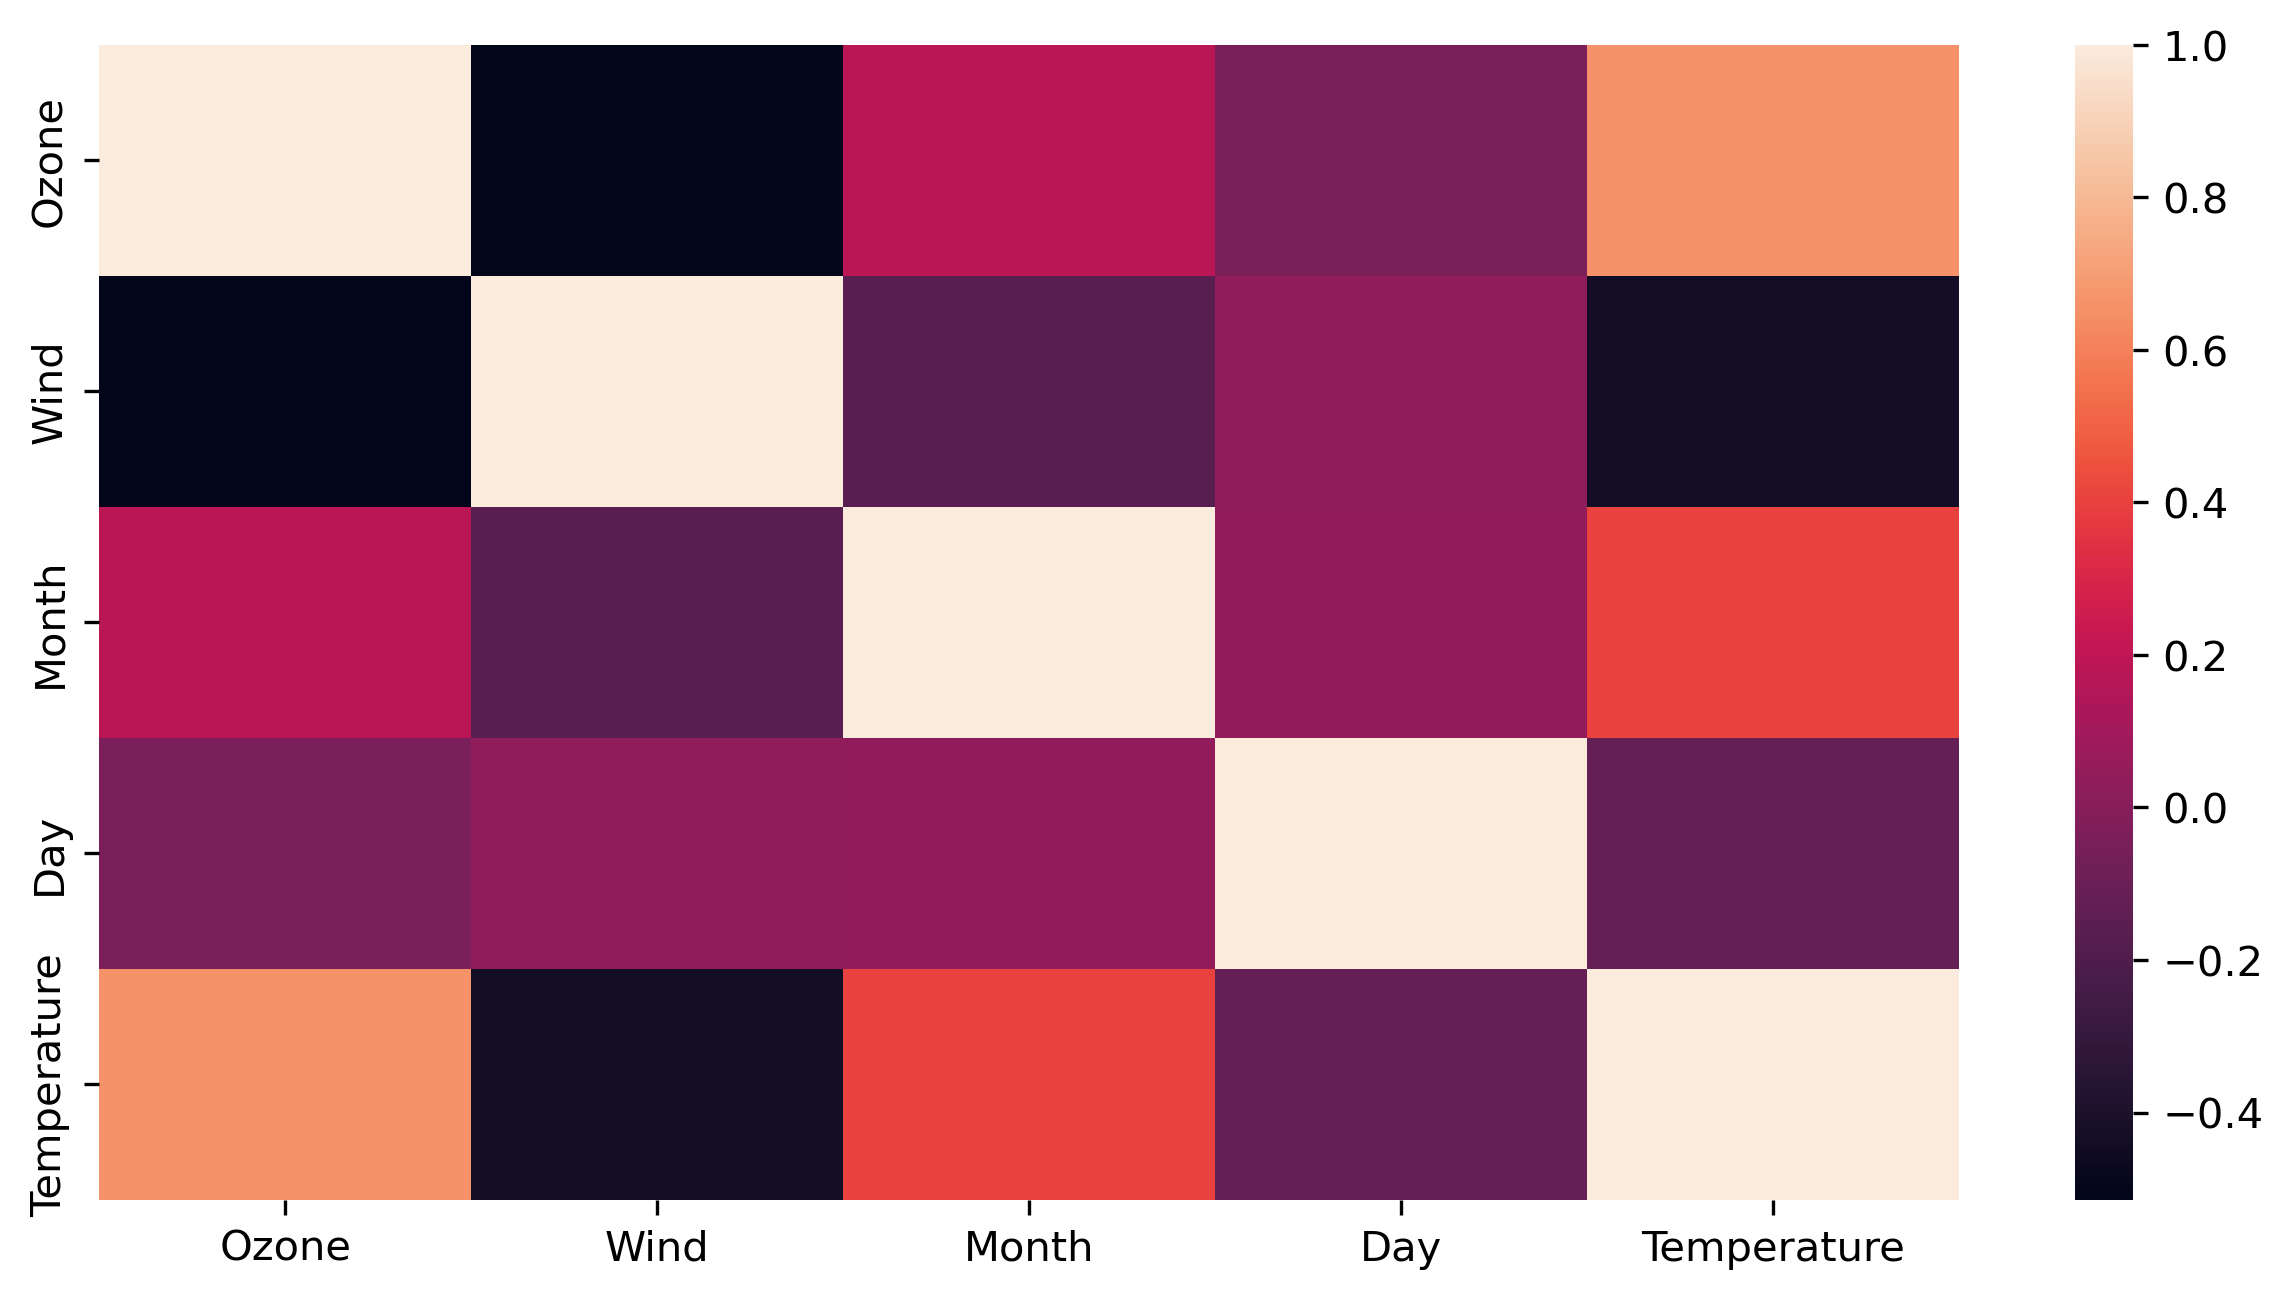

In [72]:
# for big data or large data set
sns.heatmap(df.corr())

<Axes: >

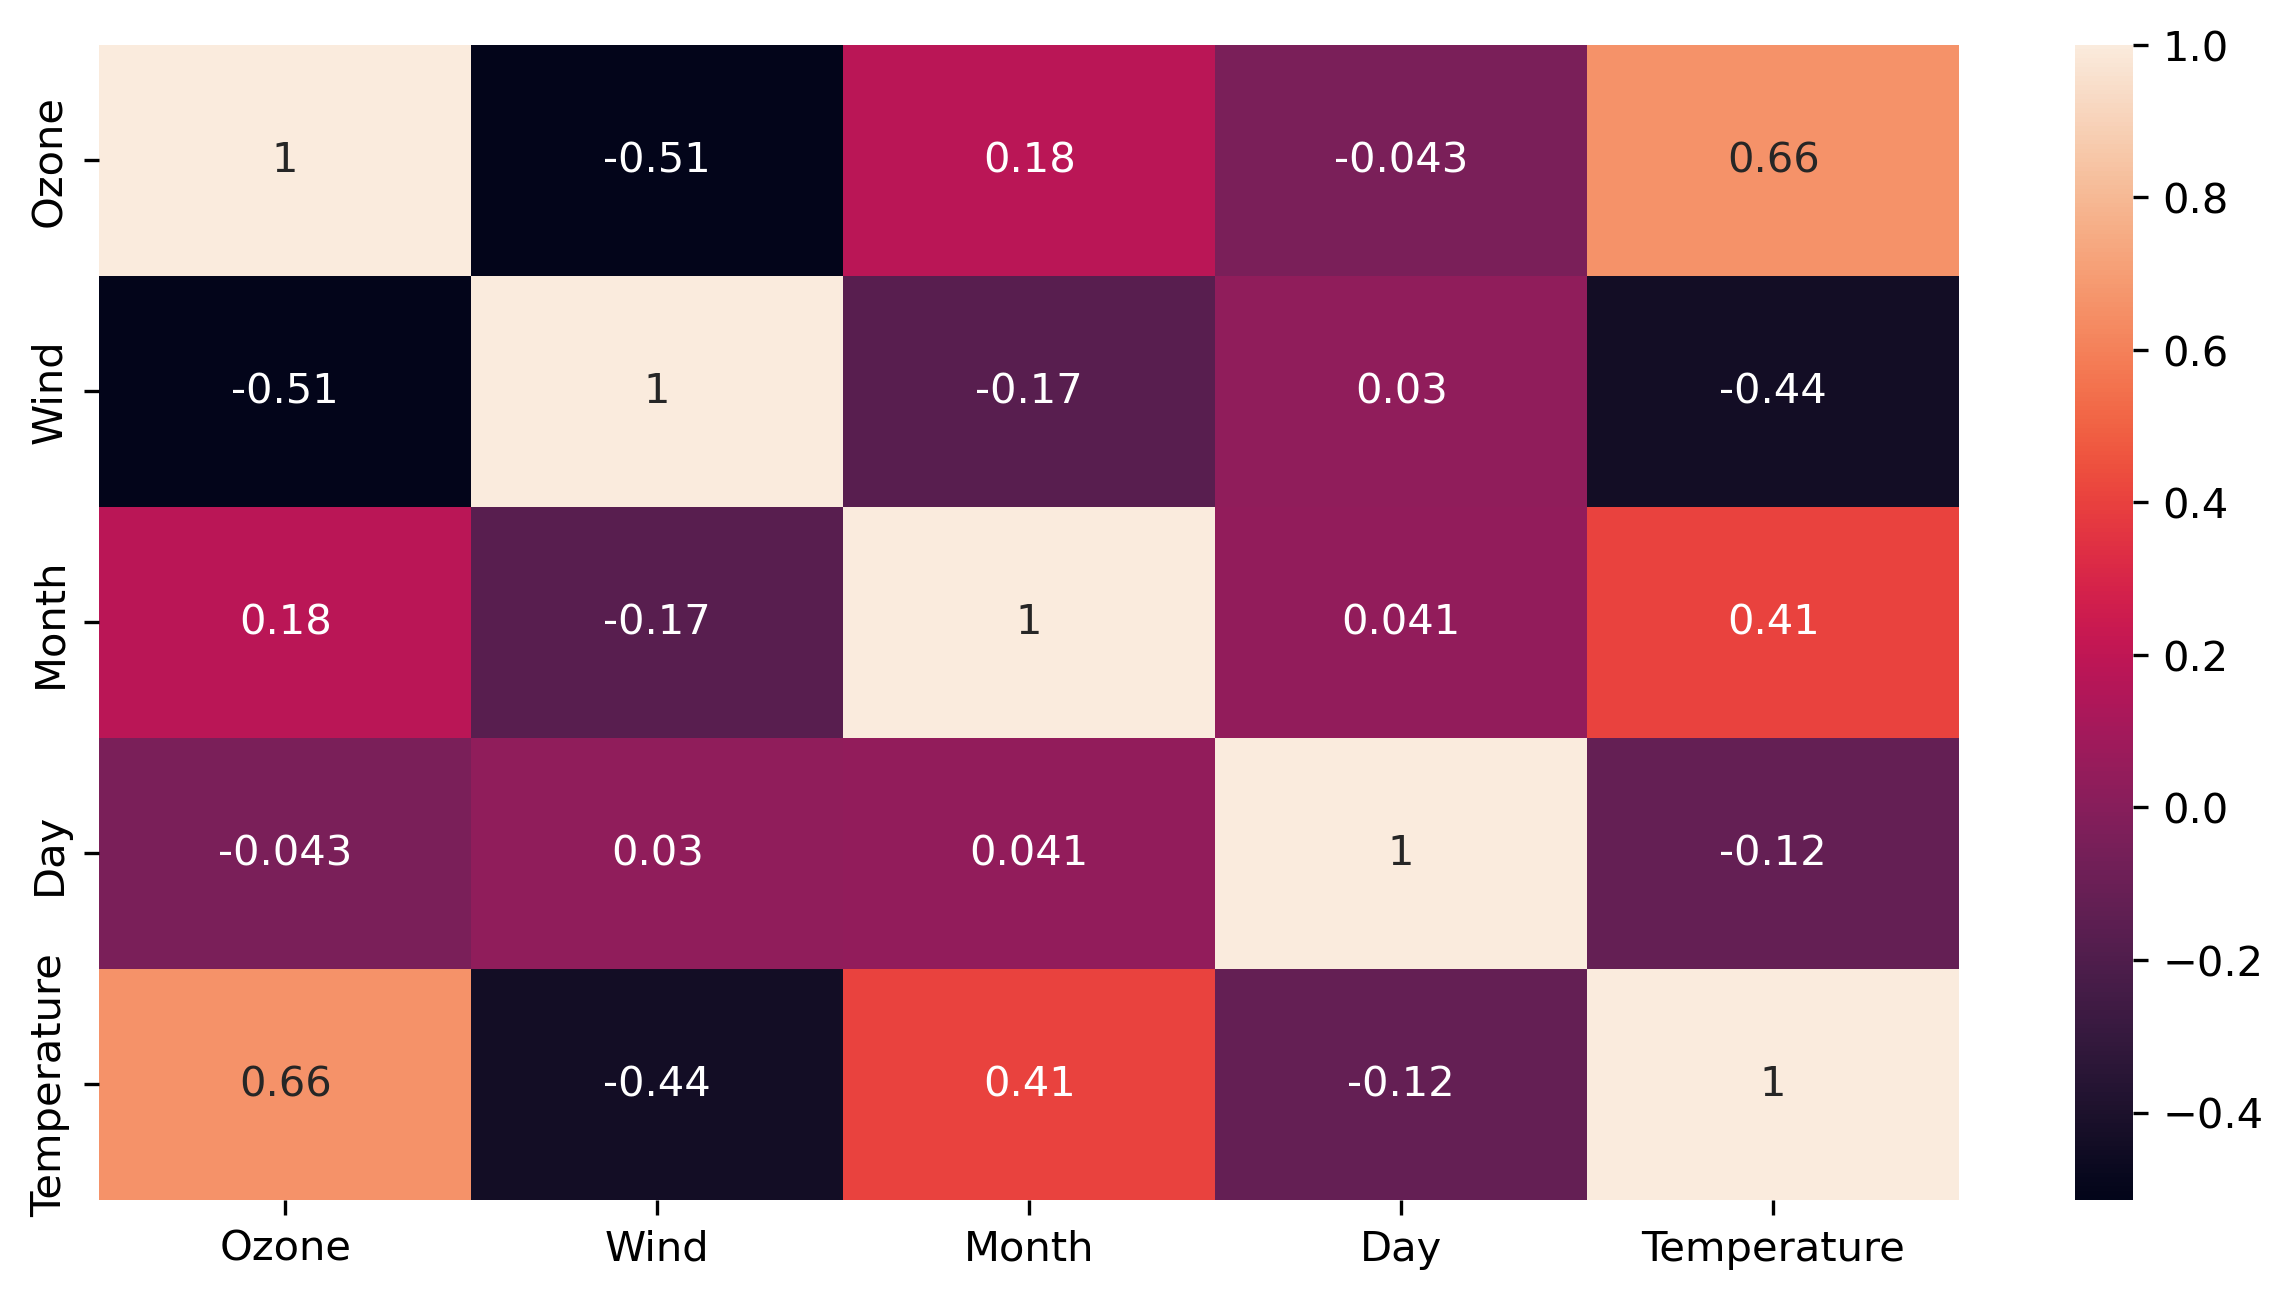

In [73]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

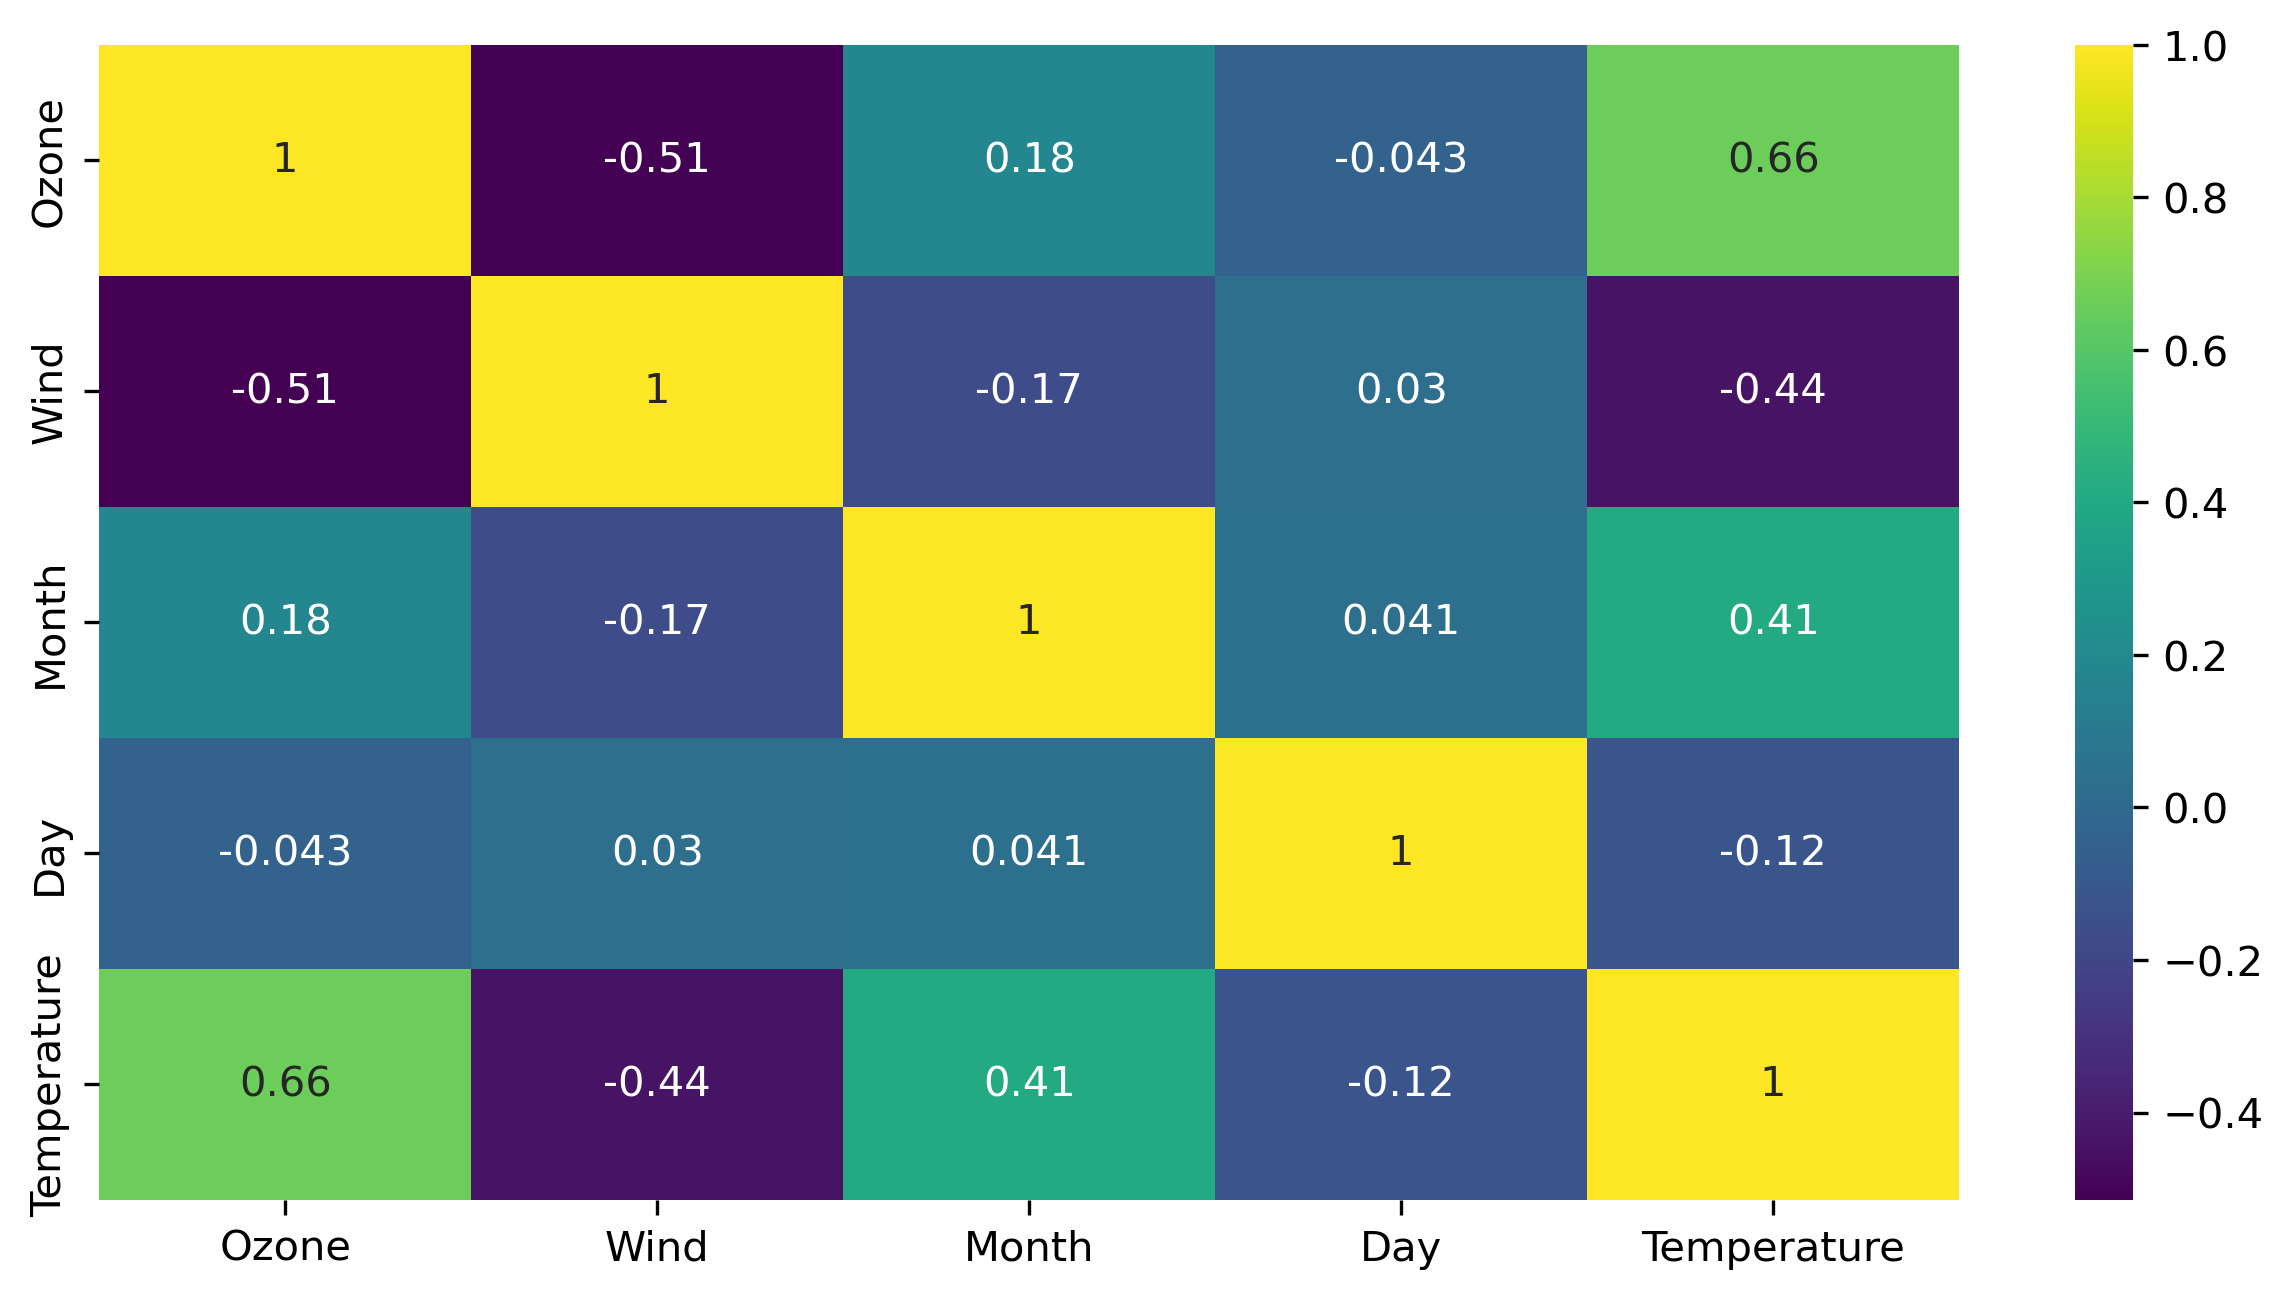

In [74]:
sns.heatmap(df.corr(),annot = True, cmap='viridis')

# Going to Part -2